**Training a Basic Convolutional Neural Network (CNN) on the MNIST Dataset - Handwritten Digits**

In this tutorial, we will explore the process of building and training a straightforward Convolutional Neural Network model using PyTorch. The goal is to teach the model how to recognize hand-drawn digits within the MNIST dataset.

**Steps:**
1. Importing PyTorch Library and Functions
2. Defining Our Neural Network Architecture
3. Loading the Dataset
4. Inspecting and Visualizing the Image Dataset
5. Creating a Data Loader to Load Batches of Images
6. Constructing Our Model
7. Training Our Model
8. Analyzing Its Accuracy
9. Saving Our Trained Model
10. Plotting the Training Logs

In [2]:
# Import the PyTorch library
import torch

# Import the torchvision library for computer vision tasks
import torchvision

# Import the 'transforms' module for image data preprocessing
import torchvision.transforms as transforms

# Import the 'optim' module for optimization algorithms
import torch.optim as optim

# Import the 'nn' module for neural network components
import torch.nn as nn




**import torch:** This line imports the PyTorch library. PyTorch is an open-source machine learning framework that provides tools for building and training neural networks.

**import torchvision:** This imports the torchvision library, which is a PyTorch package specifically designed for computer vision tasks. It includes datasets, models, and various utilities for working with image data.

**import torchvision.transforms as transforms:** Here, the code imports the transforms module from torchvision. This module contains various image transformations that can be applied to the input data. These transformations are often used to preprocess and augment image data before feeding it into neural networks.

**import torch.optim as optim:** This line imports the optim module from the PyTorch library. The optim module provides various optimization algorithms, such as stochastic gradient descent (SGD), that are used to update the model's parameters during training.

**import torch.nn as nn:** This line imports the nn module from PyTorch, which contains neural network-related modules and classes. It includes various layers, loss functions, and other components used to define and train neural networks.

**2. Creating Data Transformations**
Transformations are essential for preparing image data to meet the necessary input format for our model. This process involves utilizing the transforms.Compose function  to create a transformation pipeline. Within this pipeline, we execute a sequence of operations, which are passed as arguments.

We employ transforms.ToTensor() to convert image data into PyTorch Tensors.
Additionally, we use transforms.Normalize() to standardize the pixel values.
When invoking transforms.Normalize, we provide the input arguments (0.5,) to normalize the image data within the range of -1 to +1. Please note that when dealing with RGB images, we should use transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)).
It's crucial to understand that the MNIST dataset contains grayscale images with pixel values ranging from 0 to 255. Each image has dimensions of 28 pixels in both height and width, with a depth of 1 due to its grayscale nature.

Why Normalize?

Normalization is employed to ensure that all features, specifically pixel intensities in our case, are treated equally during the CNN training process.
It accelerates the training process by preventing oscillations.
**Normalization removes any biases or skewness in the image data.**

Why 0.5?
The normalization formula is defined as: normalized_value = (original_value - mean) / standard_deviation. When we set the mean and standard deviation to 0.5 using (0.5, 0.5), it results in:

Minimum value: (0 - 0.5) / 0.5 = -1
Maximum value: (1 - 0.5) / 0.5 = 1
For color images, we use (0.5, 0.5, 0.5) as a tuple to set the mean of the RGB channels to 0.5, and another tuple (0.5, 0.5, 0.5) to set the standard deviation to 0.5."

Explanation:
In this section of the code or tutorial, data transformations are introduced to prepare image data for input into a deep learning model. The process begins with a description of why transformations are necessary. Image data usually needs to be preprocessed to ensure it conforms to the model's input requirements.

The transforms.Compose function is introduced as a means to create a pipeline of transformations. These transformations include transforms.ToTensor() to convert the image data into PyTorch Tensors and transforms.Normalize() to standardize pixel values. The latter is explained in detail, particularly regarding the significance of using (0.5,) to normalize the pixel values to the range of -1 to +1. It's also noted that when dealing with color (RGB) images, a different set of values is employed for normalization.

The rationale for normalization is then discussed, emphasizing its role in ensuring equal weighting of pixel intensities during training, speeding up training by preventing oscillations, and eliminating biases in the data. The choice of 0.5 as the mean and standard deviation for normalization is explained using the normalization formula. This clarification includes the calculation of minimum and maximum values resulting from the chosen parameters.

Overall, this section provides a detailed explanation of why and how data transformations, specifically normalization, are crucial in the context of image data preparation for deep learning.

In [3]:
# Data Transformation: Convert to PyTorch Tensors and Normalize to -1 to +1 Range

# Explanation:
# This section of code defines a data transformation pipeline using PyTorch's 'transforms.Compose'. The purpose of this transformation is twofold:
# 1. To convert the image data into PyTorch Tensors, which are the preferred data format for neural network processing.
# 2. To normalize the pixel values, ensuring they fall within the range of -1 to +1. This normalization is crucial for effective model training.

# The 'transforms.ToTensor()' operation converts the image data into PyTorch Tensors.
# The 'transforms.Normalize((0.5, ), (0.5, ))' operation standardizes the pixel values by adjusting the mean and standard deviation to achieve the desired pixel value range.

# This transformation is an essential preprocessing step before inputting the data into the model, as it facilitates better convergence during training and mitigates potential issues related to data distribution and scale.

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, )) ])


3. **Obtaining the MNIST Dataset with torchvision**


Transformations are applied when the dataset is loaded by our data loader. The dataset itself remains unaltered; only batches of images are transformed and copied during each iteration by our data loader.

For additional datasets accessible through torchvision, you can explore them here: https://pytorch.org/vision/stable/datasets.html"



In [4]:
# Load Training and Test Data with Specified Transformations

# Explanation:
# In this section of the code, we load both the training and test datasets using the torchvision library. Importantly, we also specify the transformations to be applied when loading the data. These transformations are defined by the 'transform' variable, which we created earlier. This step is crucial to ensure that the image data is appropriately prepared for training and evaluation by our deep learning model.

# Load Training Data:
# We load the training dataset with the 'torchvision.datasets.MNIST' function. The function takes several arguments:
# - 'mnist' specifies the directory where the dataset is stored or will be downloaded.
# - 'train=True' indicates that we are loading the training set.
# - 'download=True' prompts the function to download the dataset if it's not already available locally.
# - 'transform=transform' specifies that the transformations defined by the 'transform' variable should be applied to the loaded data.

# Load Test Data:
# Similarly, we load the test dataset using 'torchvision.datasets.MNIST'. The arguments are as follows:
# - 'mnist' specifies the directory.
# - 'train=False' indicates that this is the test set.
# - 'download=True' will download the dataset if not present locally.
# - 'transform=transform' applies the same set of transformations to the test data, ensuring consistency between the training and test datasets.

# By specifying the 'transform' parameter during dataset loading, we ensure that the data is converted to PyTorch Tensors and normalized to the desired range, making it suitable for training and evaluation with our deep learning model.

train_data = torchvision.datasets.MNIST('mnist',
                                      train = True,
                                      download = True,
                                      transform = transform)
test_data = torchvision.datasets.MNIST('mnist',
                                     train = False,
                                     download = True,
                                     transform = transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 24915478.34it/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 78761829.53it/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27487972.42it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12558028.19it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



**About Training and Test Data**
The data used in this context can be categorized into two main subsets:

Training Data: This subset is used to optimize the model's parameters during the training process.

Test/Validation Data: This subset serves the purpose of evaluating the model's performance.

Throughout the training process, it's common practice to continuously monitor how well the model performs on the test data.

Best Practices in Machine Learning

In good machine learning practice, it's often advisable to reserve a separate test set exclusively for testing the final model. This helps in obtaining an unbiased estimate of the model's performance on unseen data.

However, in the case of MNIST, there isn't a distinct, separate test set available. As a result, we use the test set for both model validation and final testing.

In [5]:
# We have 60,000 Image samples for our training data & 10,000 for our test data
# each 28 x 28 pixels, as they are grayscale, there is no 3rd dimension to our image
print(train_data.data.shape)
print(test_data.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [6]:
print(train_data.data[0].shape)
print(train_data.data[0])

torch.Size([28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,  

**Plot in OpenCV**

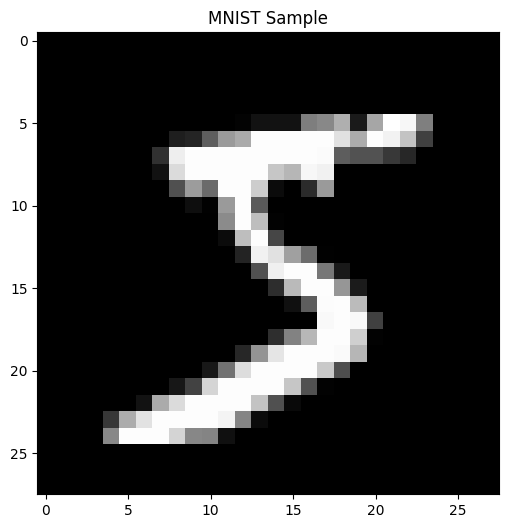

In [7]:
# Displaying an MNIST Sample Image

# Explanation:
# In this section of the code, we are using the OpenCV (cv2) library along with NumPy and Matplotlib to display a sample image from the MNIST dataset.

# Importing Necessary Libraries:
# - 'import cv2': This imports the OpenCV library, which is commonly used for image processing tasks.
# - 'import numpy as np': We import the NumPy library and alias it as 'np.' NumPy is essential for handling arrays and numerical operations.
# - 'from matplotlib import pyplot as plt': We import the 'pyplot' module from Matplotlib for visualization. It is aliased as 'plt.'

# Defining the 'imgshow' Function:
# - 'imgshow' is a custom function used for displaying images. It takes three arguments:
#   - 'title' (optional): This argument allows specifying a title for the displayed image.
#   - 'image': The image to be displayed.
#   - 'size': The size of the displayed image (default is 6).
# - Inside the function:
#   - The function calculates the aspect ratio of the image to ensure that the displayed image's proportions are preserved.
#   - It creates a Matplotlib figure with a specified size and displays the image using the 'imshow' function.
#   - The image is converted from BGR format to RGB format, which is suitable for display with Matplotlib.
#   - Finally, the title and image are shown using 'plt.title' and 'plt.show'.

# Loading and Displaying the MNIST Sample Image:
# - The code loads an image from the 'trainset' dataset, specifically the first data point (trainset.data[0]). This image is then converted to a NumPy array.
# - The 'imgshow' function is called to display this MNIST sample image. The title "MNIST Sample" is provided for the image, and the default size is used.

# This code snippet serves as a simple example of how to display an image using OpenCV, NumPy, and Matplotlib, and it allows for easy visualization of the MNIST dataset.

import cv2
import numpy as np
from matplotlib import pyplot as plt


def imgshow(title="", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


image = train_data.data[0].numpy()
imgshow("MNIST Sample", image)





**Using matplotlib to show many examples from our dataset**

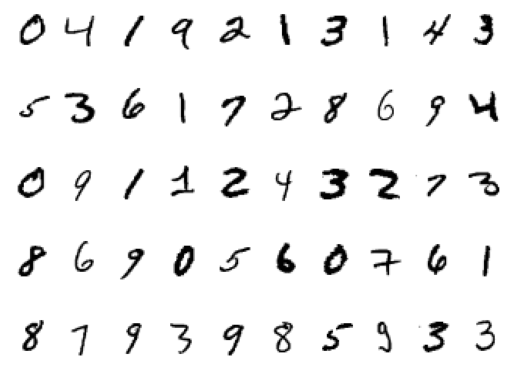

In [8]:
# Viewing the First 100 Images of the MNIST Training Dataset

# Explanation:
# In this section of the code, we aim to visualize the first 100 images from the MNIST training dataset using Matplotlib for plotting.

# Importing the Necessary Library:
# - 'import matplotlib.pyplot as plt': This line imports the 'pyplot' module from Matplotlib and aliases it as 'plt.' Matplotlib is a popular library for creating visualizations.

# Creating a Matplotlib Figure:
# - 'figure = plt.figure()': This line initializes a Matplotlib figure, which will serve as the container for our set of subplots.

# Setting the Number of Images to Display:
# - 'num_of_images = 50': We specify the number of images to be displayed, in this case, the first 50 images from the training dataset.

# Loop for Displaying Images:
# - We use a 'for' loop to iterate through the range from 1 to 'num_of_images + 1' (inclusive).
# - Within the loop, we create individual subplots for each image using 'plt.subplot.'
# - We turn off the axis labels for each subplot using 'plt.axis('off')' to improve visual clarity.

# Displaying Images:
# - For each subplot, we use 'plt.imshow' to display the corresponding image. The 'trainset.data[index]' represents the image data at the specified index.
# - We specify 'cmap='gray_r'' to ensure the images are displayed in grayscale with reversed (white-on-black) colormap.

# Summary:
# This code segment sets up a Matplotlib figure and displays the first 50 images from the MNIST training dataset in a 5x10 grid. The images are shown in grayscale, providing a visual inspection of the dataset for a quick overview.

import matplotlib.pyplot as plt

figure = plt.figure()
num_of_images = 50

for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index)
    plt.axis('off')
    plt.imshow(train_data.data[index], cmap='gray_r')






**Creating Our Data Loader**
A Data Loader is a function that we will use to fetch our data in specified batch sizes (in this case, we'll use a batch size of 128) during the training process.

It's important to note that we cannot feed all of our data through the neural network at once. Therefore, we divide our dataset into smaller batches for processing. This is a common practice in deep learning.

We configure the data loader with 'shuffle' set to 'True' to prevent any sequence bias in the data. In certain datasets, the classes might be ordered, which could lead to loading batches containing only one class. Shuffling the data ensures a more balanced distribution of classes in each batch.

Additionally, we have the 'num_workers' parameter, which specifies how many CPU cores we want to utilize for data loading. If set to 0, the main process will handle data loading when required. Generally, it's advisable to leave it as 0 unless there is a specific need for experimentation.

In [9]:
# Creating Data Loaders for Training and Testing

# Explanation:
# In this section, we instantiate two data loaders—one for the training dataset and another for the test dataset—using the PyTorch 'DataLoader' class. Data loaders are essential for efficiently processing and iterating over the data during training and testing of deep learning models.

# Training Data Loader:
# - 'trainloader' is created to load the 'trainset' dataset.
# - 'batch_size = 128' specifies that the data will be processed in batches of 128 examples at a time.
# - 'shuffle = True' ensures that the order of data is randomized within each batch to prevent sequence bias.
# - 'num_workers = 0' indicates that the main process will handle data loading. There are no additional CPU cores used for data loading in parallel.

# Test Data Loader:
# - 'testloader' is configured to load the 'testset' dataset.
# - 'batch_size = 128' specifies the same batch size as used for the training data.
# - 'shuffle = False' keeps the test data in its original order since shuffling is not needed during testing.
# - 'num_workers = 0' signifies that the main process is responsible for loading test data.

# The data loaders are now ready for use in training and evaluating the deep learning model. They provide a convenient way to access and process data in manageable batches.

trainloader = torch.utils.data.DataLoader(train_data,
                                           batch_size = 128,
                                           shuffle = True,
                                           num_workers = 0)

testloader = torch.utils.data.DataLoader(test_data,
                                          batch_size = 128,
                                          shuffle = False,
                                          num_workers = 0)

In [10]:
# Accessing Training Data Batches

# Explanation:
# In this section of the code, we use Python functions to access and retrieve batches of training data from the 'trainloader' data loader. The primary objective is to demonstrate how to work with data loaders to obtain and inspect batches of data for training.

# Obtaining an Iterator:
# - 'dataiter = iter(trainloader)' creates an iterator 'dataiter' from the 'trainloader' object. This iterator allows us to access data in a sequential manner, one batch at a time.

# Retrieving the First Batch:
# - 'images, labels = dataiter.next()' uses the 'next' function to retrieve the first batch of data from 'dataiter.' This batch consists of both images and their corresponding labels.

# Displaying Batch Dimensions:
# - 'print(images.shape)' and 'print(labels.shape)' are used to display the dimensions of the images and labels in the first batch. This provides insight into the shape and size of the data in the batch.

# Summary:
# This code segment demonstrates the process of obtaining and inspecting the first batch of training data from the 'trainloader.' It serves as an illustration of how to work with data loaders, retrieve data batches, and gain an understanding of the data dimensions for further processing in a deep learning model.


dataiter = iter(trainloader)
start_batch = 0
end_batch = 5

for batch_idx in range(start_batch, end_batch):
    images, labels = next(dataiter)


    print(f"Batch {batch_idx + 1} - Images: {images.shape}, Labels: {labels.shape}")

Batch 1 - Images: torch.Size([128, 1, 28, 28]), Labels: torch.Size([128])
Batch 2 - Images: torch.Size([128, 1, 28, 28]), Labels: torch.Size([128])
Batch 3 - Images: torch.Size([128, 1, 28, 28]), Labels: torch.Size([128])
Batch 4 - Images: torch.Size([128, 1, 28, 28]), Labels: torch.Size([128])
Batch 5 - Images: torch.Size([128, 1, 28, 28]), Labels: torch.Size([128])


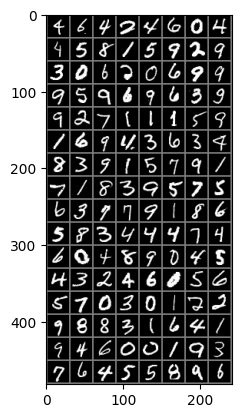

46424604458159293062069995969639927111591694363483915791718395756377918658344474604890454324605657030122988316419460019376455896


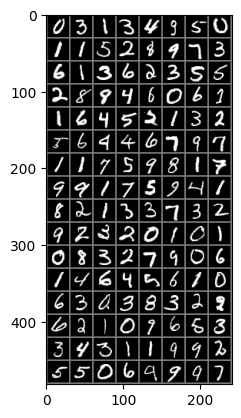

03134950115289736136235528846061164521325644679711759817991759418213373292320101083279061464561063038328621096533431199255069997


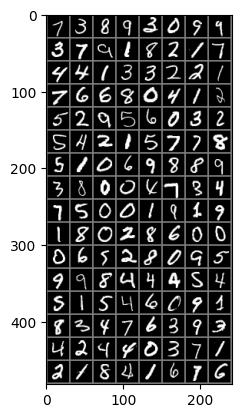

73893099379182174413322176680412529560325421577851069889380047347500191918028600065280959984445451546091834763934244037121841676


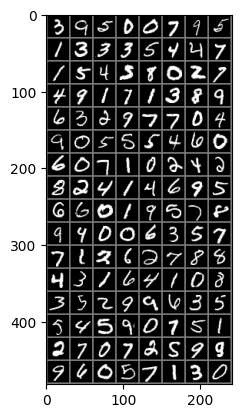

39500795133354471545802749171389632977049055546060710242824146956601957894006357712627884316410835299635545907512707259996057130


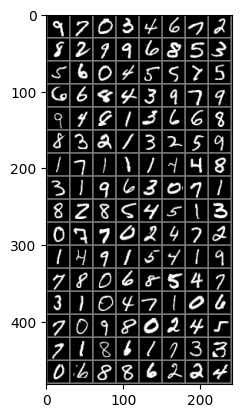

97034672829968535604557566843979948136688321325917111448319630718285451307702472149154197806854731047106709802457186173306886224


In [11]:
# Displaying Random Training Images with Labels

# Explanation:
# This code is designed to display a batch of random training images along with their associated labels. It utilizes Matplotlib for image visualization and NumPy for array operations.

# Importing Necessary Libraries:
import matplotlib.pyplot as plt
import numpy as np

# Defining the 'imshow' Function:
# This custom function 'imshow' is used to display images. It follows these steps:
# 1. Unnormalizes the image by scaling it (from 0 to 1 back to the original scale).
# 2. Converts the image data to a NumPy array.
# 3. Transposes the array to match the (height, width, channels) format.
# 4. Displays the image using Matplotlib.

# Retrieving a Batch of Random Training Images:
# The code obtains a batch of random training images and their corresponding labels by creating an iterator 'dataiter' from the 'trainloader' data loader and using the 'next' function to retrieve the next batch of data.

# Displaying Images:
# The 'imshow' function is then called to display the batch of images. It uses the 'make_grid' function from 'torchvision.utils' to arrange the images into a grid for visualization.

# Printing Labels:
# Finally, the code prints the labels associated with the displayed images. It iterates through the first 128 labels in the batch and prints them one by one. The 'join' and formatting operations ensure that the labels are displayed in a readable format.

# Summary:
# This code segment provides a practical demonstration of displaying training images and their labels, offering insights into the data and its corresponding labels for verification and visualization.

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


num_images_to_display = 5


for batch_idx, (images, labels) in enumerate(dataiter):
    if batch_idx >= num_images_to_display:
        break

    # Show images
    imshow(torchvision.utils.make_grid(images))

    # Print labels
    print(''.join('%1s' % labels[j].numpy() for j in range(128)))


**Building a Convolution Filter Layer**

In [12]:
nn.Conv2d(in_channels=1,
          out_channels=32,
          kernel_size=3,
          stride=1,
          padding=1)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

**in_channels=1:** This argument specifies the number of input channels or feature maps. In this case, in_channels is set to 1, which typically indicates that the input data is grayscale or single-channel images. If you were dealing with color images (RGB), you would set in_channels to 3 to accommodate the three color channels (red, green, and blue).

**out_channels=32:** This argument determines the number of output channels or feature maps. The convolutional layer applies a set of 2D filters (kernels) to the input data, creating multiple feature maps as output. Here, out_channels is set to 32, which means that the layer will generate 32 different feature maps as its output. Each feature map represents a different aspect of the input data.

**kernel_size=3:** This argument specifies the size of the convolutional kernel or filter. The kernel is a small window that moves over the input data to perform convolutions. In this case, kernel_size is set to 3, indicating a 3x3 kernel. The size of the kernel defines the spatial extent over which the convolution is applied.

**stride=1:** The stride determines how the convolutional kernel moves over the input data. A value of 1 means that the kernel moves one pixel at a time. Larger stride values would result in larger spatial reductions in the output feature maps.

**padding=1:** Padding is used to control the spatial dimensions of the output feature maps. A padding of 1 means that a border of one pixel is added around the input data before applying the convolution. This is often used to maintain the spatial dimensions of the output feature maps, especially when kernel_size is an odd number.

In summary, the code creates a 2D convolutional layer with 1 input channel, 32 output channels, a 3x3 kernel, a stride of 1, and 1-pixel padding. This layer is commonly used in convolutional neural networks (CNNs) for image processing tasks and is responsible for extracting various features from the input data. The specific values of these arguments can be adjusted to suit the requirements of a particular neural network architecture and task.

In [17]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim  # Import the optimizer module

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the Net class
net = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming you have already defined your trainloader and testloader

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the input if it's a 28x28 image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the model
net = Net()

# Define your loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

epochs = 10

epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(epochs):
    print(f'Starting Epoch: {epoch + 1}...')
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 50 == 49:
            correct = 0
            total = 0

            with torch.no_grad():
                for data in testloader:
                    images, labels = data

                    outputs = net(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            accuracy = 100 * correct / total
            epoch_num = epoch + 1
            actual_loss = running_loss / 50
            print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i + 1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
            running_loss = 0.0

    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)


Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 50, Loss: 2.287, Test Accuracy = 26.160%
Epoch: 1, Mini-Batches Completed: 100, Loss: 2.216, Test Accuracy = 36.270%
Epoch: 1, Mini-Batches Completed: 150, Loss: 2.103, Test Accuracy = 50.990%
Epoch: 1, Mini-Batches Completed: 200, Loss: 1.938, Test Accuracy = 60.540%
Epoch: 1, Mini-Batches Completed: 250, Loss: 1.716, Test Accuracy = 65.490%
Epoch: 1, Mini-Batches Completed: 300, Loss: 1.437, Test Accuracy = 71.300%
Epoch: 1, Mini-Batches Completed: 350, Loss: 1.170, Test Accuracy = 75.470%
Epoch: 1, Mini-Batches Completed: 400, Loss: 0.982, Test Accuracy = 80.210%
Epoch: 1, Mini-Batches Completed: 450, Loss: 0.846, Test Accuracy = 80.860%
Starting Epoch: 2...
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.723, Test Accuracy = 82.950%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.643, Test Accuracy = 84.360%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.605, Test Accuracy = 84.670%
Epoch: 2, Mini-Batches Completed: 200, Loss: 0.5

In [20]:
PATH = './mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)

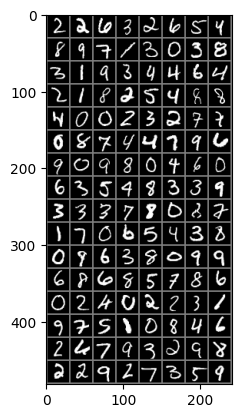

GroundTruth:  22632654897130383193446421825488400232770874479690980460635483393337808217065438096380996868578602402231975108462679329822927359


In [21]:
dataiter = iter(testloader)
start_batch = 0
end_batch = 5

for batch_idx in range(start_batch, end_batch):
    images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ',''.join('%1s' % labels[j].numpy() for j in range(128)))

In [22]:
net=Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

**Getting Predictions**

In [23]:


dataiter = iter(testloader)  # Create an iterator to loop through the test data
start_batch = 0  # Starting batch index
end_batch = 5  # Ending batch index (exclusive)

# Loop through the specified batches of test data
for batch_idx in range(start_batch, end_batch):
    images, labels = next(dataiter)  # Get the next batch of test data

# Perform inference using the pre-trained neural network
outputs = net(images)  # Pass the batch of images through the network

# Find the predicted labels by selecting the class with the highest probability
_, predicted = torch.max(outputs, 1)

# Print the predicted labels for the batch
print('Predicted Labels:', ' '.join('%d' % predicted[j].item() for j in range(len(predicted))))

# Explanation:
# - We create an iterator 'dataiter' to go through the test data.
# - 'start_batch' and 'end_batch' specify the range of batches to process.
# - In the loop, we load the next batch of images and labels.
# - The 'net' is used to make predictions on the batch of images.
# - We find the predicted labels by selecting the class with the highest probability for each image.
# - Finally, we print the predicted labels for the entire batch.


Predicted Labels: 2 2 6 3 2 6 5 4 8 9 7 1 5 0 3 8 3 1 9 6 4 4 6 4 2 1 8 2 5 4 8 3 4 0 0 2 3 2 7 1 0 8 7 4 4 7 9 6 9 0 9 8 0 9 6 0 6 5 5 4 8 3 3 9 3 3 2 7 8 0 2 2 1 7 0 6 5 4 3 3 0 9 6 3 8 0 9 9 6 8 6 8 5 7 8 6 0 2 2 0 2 8 3 1 9 7 5 8 0 8 4 6 2 6 7 9 9 6 9 8 2 2 9 2 7 3 5 9


**Showing test accuracy again**

In [25]:
import torch

# Initialize variables to keep track of correct predictions and the total number of test samples
correct = 0
total = 0

# Use torch.no_grad() to avoid gradient calculations during inference
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Pass the test images through the neural network
        outputs = net(images)

        # Find the predicted labels by selecting the class with the highest probability
        _, predicted = torch.max(outputs.data, 1)

        # Update the count of correct predictions and the total number of test samples
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate the accuracy as the percentage of correct predictions
accuracy = 100 * correct / total

# Print the accuracy of the network on the test dataset
print(f'Accuracy of the network on the {total} test images: {accuracy:.3f}%')

# Explanation:
# - We start by importing the necessary PyTorch module.
# - Two variables, 'correct' and 'total', are initialized to keep track of the number of correct predictions and the total number of test samples.
# - The code block within 'with torch.no_grad():' is a context manager that disables gradient calculations during inference. This is important for memory efficiency during testing, as gradients are not needed for evaluation.
# - Inside this context manager, a loop iterates through the 'testloader', which represents the test dataset.
# - For each batch of data in the test dataset, the images and their corresponding labels are extracted.
# - The test images are passed through the neural network ('net') to obtain 'outputs'.
# - The code then finds the predicted labels by selecting the class with the highest probability, and these predictions are stored in the 'predicted' variable.
# - The 'correct' and 'total' variables are updated based on the number of correct predictions in the batch and the total number of test samples in the batch.
# - After processing all the test data, the code calculates the accuracy as the percentage of correct predictions out of the total and stores it in the 'accuracy' variable.
# - Finally, the code prints the accuracy of the network on the test dataset, expressing it as a percentage and rounding it to three decimal places.




Accuracy of the network on the 10000 test images: 92.820%


Actual Label: 6, Predicted Label: 5


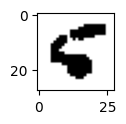

Actual Label: 0, Predicted Label: 4


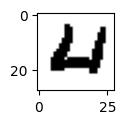

Actual Label: 2, Predicted Label: 6


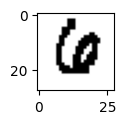

Actual Label: 7, Predicted Label: 2


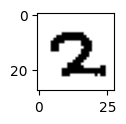

Actual Label: 4, Predicted Label: 7


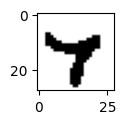

Actual Label: 9, Predicted Label: 2


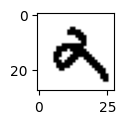

Actual Label: 5, Predicted Label: 3


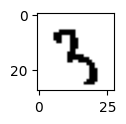

Actual Label: 7, Predicted Label: 8


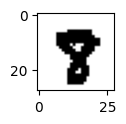

Actual Label: 8, Predicted Label: 9


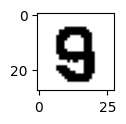

Actual Label: 5, Predicted Label: 3


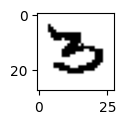

Actual Label: 2, Predicted Label: 4


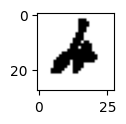

Actual Label: 0, Predicted Label: 6


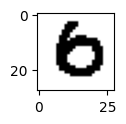

Actual Label: 4, Predicted Label: 8


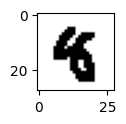

Actual Label: 6, Predicted Label: 4


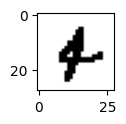

Actual Label: 5, Predicted Label: 3


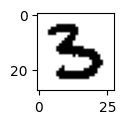

Actual Label: 3, Predicted Label: 2


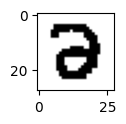

Actual Label: 1, Predicted Label: 9


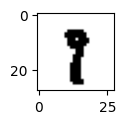

Actual Label: 7, Predicted Label: 2


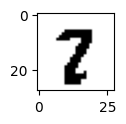

Actual Label: 3, Predicted Label: 5


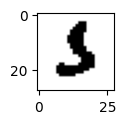

Actual Label: 4, Predicted Label: 6


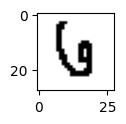

Actual Label: 0, Predicted Label: 5


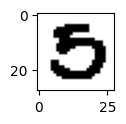

Actual Label: 9, Predicted Label: 7


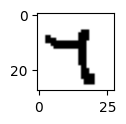

Actual Label: 7, Predicted Label: 2


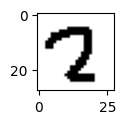

Actual Label: 7, Predicted Label: 8


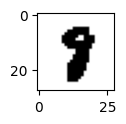

Actual Label: 8, Predicted Label: 2


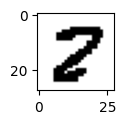

Actual Label: 0, Predicted Label: 6


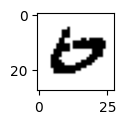

Actual Label: 8, Predicted Label: 9


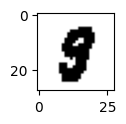

Actual Label: 5, Predicted Label: 3


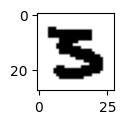

Actual Label: 8, Predicted Label: 5


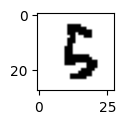

Actual Label: 3, Predicted Label: 9


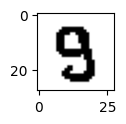

Actual Label: 3, Predicted Label: 5


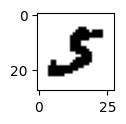

Actual Label: 5, Predicted Label: 3


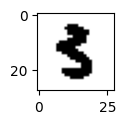

Actual Label: 8, Predicted Label: 4


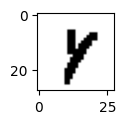

Actual Label: 5, Predicted Label: 3


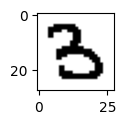

Actual Label: 6, Predicted Label: 3


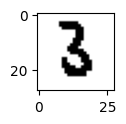

Actual Label: 3, Predicted Label: 8


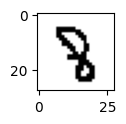

Actual Label: 1, Predicted Label: 7


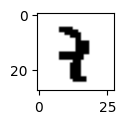

Actual Label: 9, Predicted Label: 4


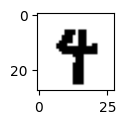

Actual Label: 5, Predicted Label: 3


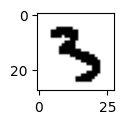

Actual Label: 2, Predicted Label: 3


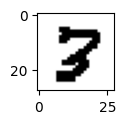

Actual Label: 2, Predicted Label: 8


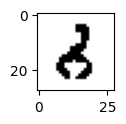

Actual Label: 3, Predicted Label: 8


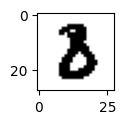

Actual Label: 2, Predicted Label: 4


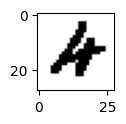

Actual Label: 8, Predicted Label: 2


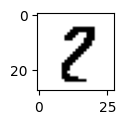

Actual Label: 8, Predicted Label: 1


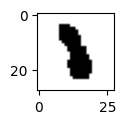

Actual Label: 9, Predicted Label: 3


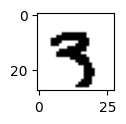

Actual Label: 6, Predicted Label: 2


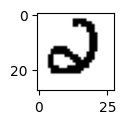

Actual Label: 9, Predicted Label: 2


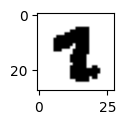

Actual Label: 3, Predicted Label: 7


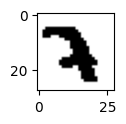

Actual Label: 4, Predicted Label: 8


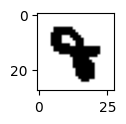

Actual Label: 9, Predicted Label: 4


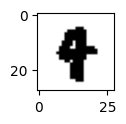

Actual Label: 5, Predicted Label: 8


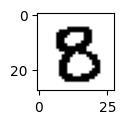

Actual Label: 6, Predicted Label: 0


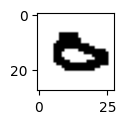

Actual Label: 8, Predicted Label: 5


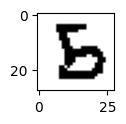

Actual Label: 8, Predicted Label: 2


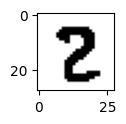

Actual Label: 9, Predicted Label: 4


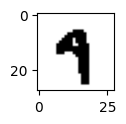

Actual Label: 8, Predicted Label: 2


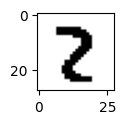

Actual Label: 9, Predicted Label: 4


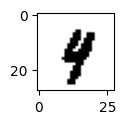

Actual Label: 5, Predicted Label: 8


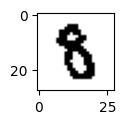

Actual Label: 9, Predicted Label: 5


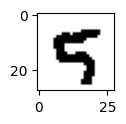

Actual Label: 2, Predicted Label: 7


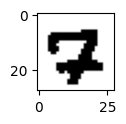

Actual Label: 3, Predicted Label: 8


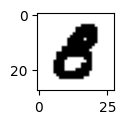

Actual Label: 7, Predicted Label: 8


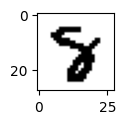

Actual Label: 3, Predicted Label: 5


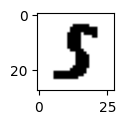

Actual Label: 9, Predicted Label: 4


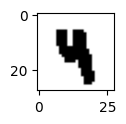

Actual Label: 2, Predicted Label: 7


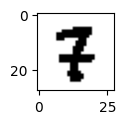

Actual Label: 7, Predicted Label: 2


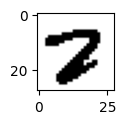

Actual Label: 5, Predicted Label: 3


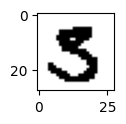

Actual Label: 0, Predicted Label: 2


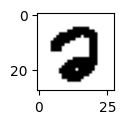

Actual Label: 9, Predicted Label: 8


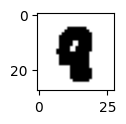

Actual Label: 2, Predicted Label: 7


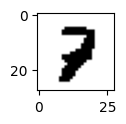

Actual Label: 6, Predicted Label: 1


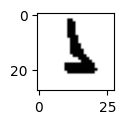

Actual Label: 5, Predicted Label: 4


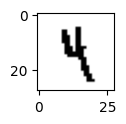

Actual Label: 0, Predicted Label: 6


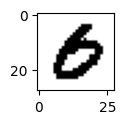

Actual Label: 8, Predicted Label: 3


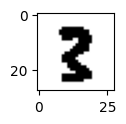

Actual Label: 3, Predicted Label: 5


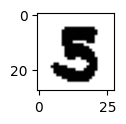

Actual Label: 9, Predicted Label: 7


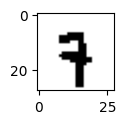

Actual Label: 5, Predicted Label: 6


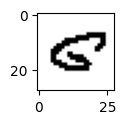

Actual Label: 8, Predicted Label: 5


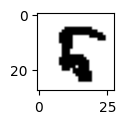

Actual Label: 9, Predicted Label: 7


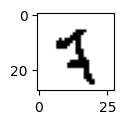

Actual Label: 8, Predicted Label: 6


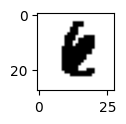

Actual Label: 6, Predicted Label: 2


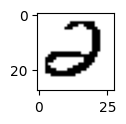

Actual Label: 7, Predicted Label: 3


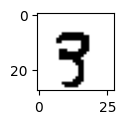

Actual Label: 4, Predicted Label: 8


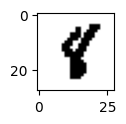

Actual Label: 3, Predicted Label: 5


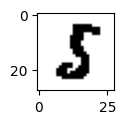

Actual Label: 9, Predicted Label: 7


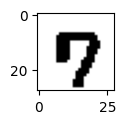

Actual Label: 2, Predicted Label: 8


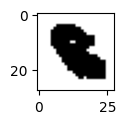

Actual Label: 3, Predicted Label: 9


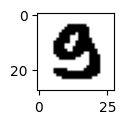

Actual Label: 6, Predicted Label: 4


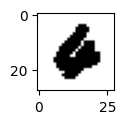

Actual Label: 8, Predicted Label: 3


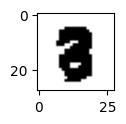

Actual Label: 2, Predicted Label: 7


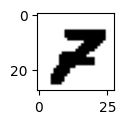

Actual Label: 9, Predicted Label: 4


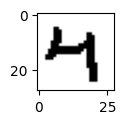

Actual Label: 9, Predicted Label: 7


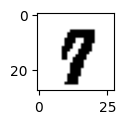

Actual Label: 1, Predicted Label: 6


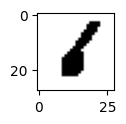

Actual Label: 8, Predicted Label: 6


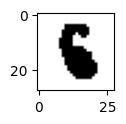

Actual Label: 6, Predicted Label: 0


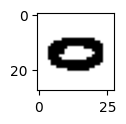

Actual Label: 4, Predicted Label: 9


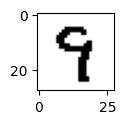

Actual Label: 9, Predicted Label: 7


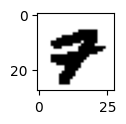

Actual Label: 4, Predicted Label: 8


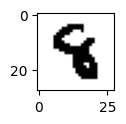

Actual Label: 5, Predicted Label: 8


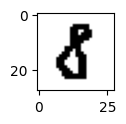

Actual Label: 5, Predicted Label: 8


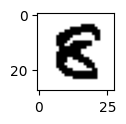

Actual Label: 8, Predicted Label: 3


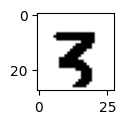

Actual Label: 2, Predicted Label: 7


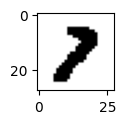

Actual Label: 6, Predicted Label: 2


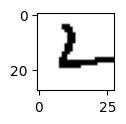

Actual Label: 2, Predicted Label: 7


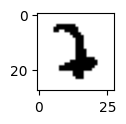

Actual Label: 3, Predicted Label: 9


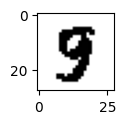

Actual Label: 4, Predicted Label: 9


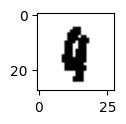

Actual Label: 5, Predicted Label: 8


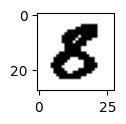

Actual Label: 9, Predicted Label: 4


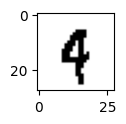

Actual Label: 0, Predicted Label: 9


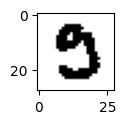

Actual Label: 5, Predicted Label: 8


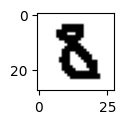

Actual Label: 6, Predicted Label: 2


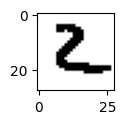

Actual Label: 5, Predicted Label: 2


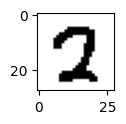

Actual Label: 1, Predicted Label: 7


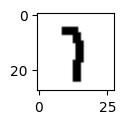

Actual Label: 2, Predicted Label: 7


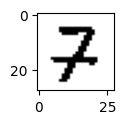

Actual Label: 9, Predicted Label: 5


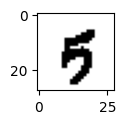

Actual Label: 5, Predicted Label: 3


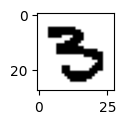

Actual Label: 7, Predicted Label: 5


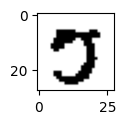

Actual Label: 3, Predicted Label: 8


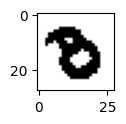

Actual Label: 6, Predicted Label: 8


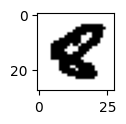

Actual Label: 2, Predicted Label: 7


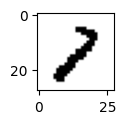

Actual Label: 9, Predicted Label: 7


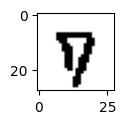

Actual Label: 6, Predicted Label: 2


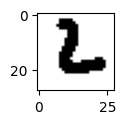

Actual Label: 2, Predicted Label: 8


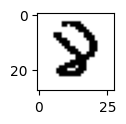

Actual Label: 6, Predicted Label: 5


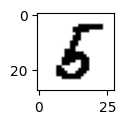

Actual Label: 3, Predicted Label: 5


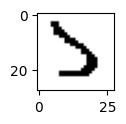

Actual Label: 6, Predicted Label: 2


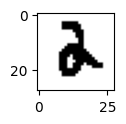

Actual Label: 9, Predicted Label: 4


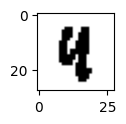

Actual Label: 1, Predicted Label: 8


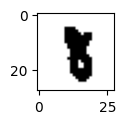

Actual Label: 9, Predicted Label: 4


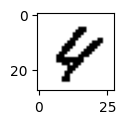

Actual Label: 7, Predicted Label: 6


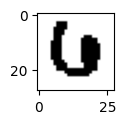

Actual Label: 9, Predicted Label: 4


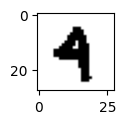

Actual Label: 2, Predicted Label: 4


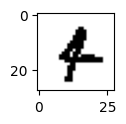

Actual Label: 9, Predicted Label: 5


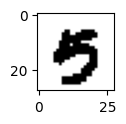

Actual Label: 0, Predicted Label: 7


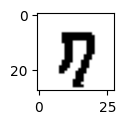

Actual Label: 1, Predicted Label: 7


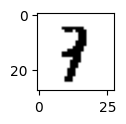

Actual Label: 9, Predicted Label: 7


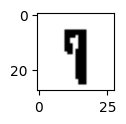

Actual Label: 0, Predicted Label: 5


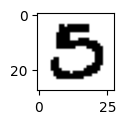

Actual Label: 6, Predicted Label: 1


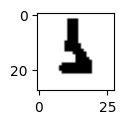

Actual Label: 7, Predicted Label: 8


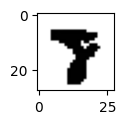

Actual Label: 2, Predicted Label: 4


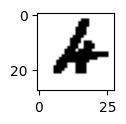

Actual Label: 8, Predicted Label: 9


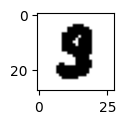

Actual Label: 7, Predicted Label: 9


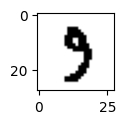

Actual Label: 7, Predicted Label: 6


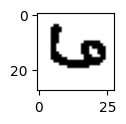

Actual Label: 9, Predicted Label: 7


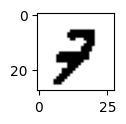

Actual Label: 5, Predicted Label: 6


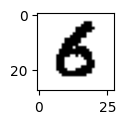

Actual Label: 6, Predicted Label: 2


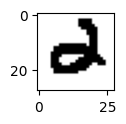

Actual Label: 6, Predicted Label: 0


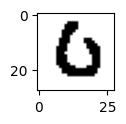

Actual Label: 5, Predicted Label: 6


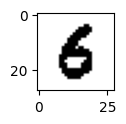

Actual Label: 7, Predicted Label: 4


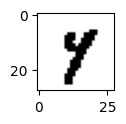

Actual Label: 9, Predicted Label: 7


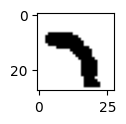

Actual Label: 7, Predicted Label: 3


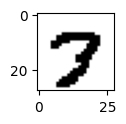

Actual Label: 5, Predicted Label: 8


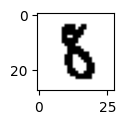

Actual Label: 1, Predicted Label: 2


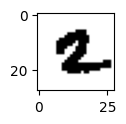

Actual Label: 5, Predicted Label: 9


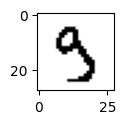

Actual Label: 0, Predicted Label: 8


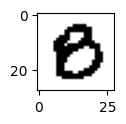

Actual Label: 9, Predicted Label: 7


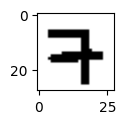

Actual Label: 9, Predicted Label: 7


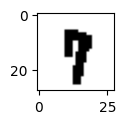

Actual Label: 4, Predicted Label: 2


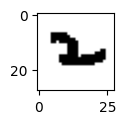

Actual Label: 2, Predicted Label: 4


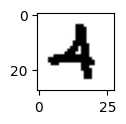

Actual Label: 2, Predicted Label: 7


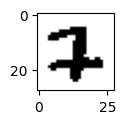

Actual Label: 6, Predicted Label: 8


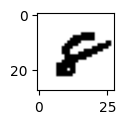

Actual Label: 5, Predicted Label: 3


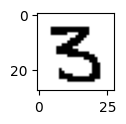

Actual Label: 9, Predicted Label: 7


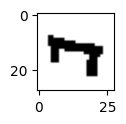

Actual Label: 5, Predicted Label: 1


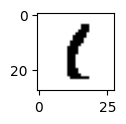

Actual Label: 5, Predicted Label: 8


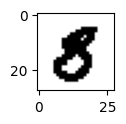

Actual Label: 2, Predicted Label: 8


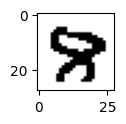

Actual Label: 9, Predicted Label: 2


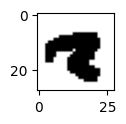

Actual Label: 4, Predicted Label: 6


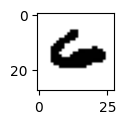

Actual Label: 5, Predicted Label: 8


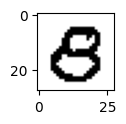

Actual Label: 7, Predicted Label: 3


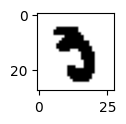

Actual Label: 9, Predicted Label: 8


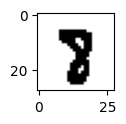

Actual Label: 4, Predicted Label: 6


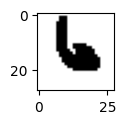

Actual Label: 9, Predicted Label: 4


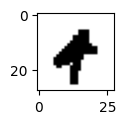

Actual Label: 4, Predicted Label: 1


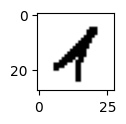

Actual Label: 3, Predicted Label: 8


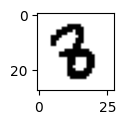

Actual Label: 0, Predicted Label: 6


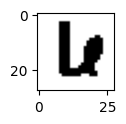

Actual Label: 4, Predicted Label: 9


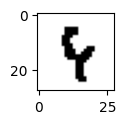

Actual Label: 8, Predicted Label: 5


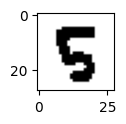

Actual Label: 5, Predicted Label: 3


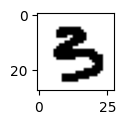

Actual Label: 4, Predicted Label: 2


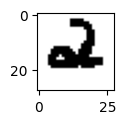

Actual Label: 6, Predicted Label: 4


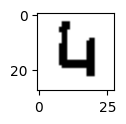

Actual Label: 0, Predicted Label: 5


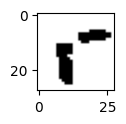

Actual Label: 5, Predicted Label: 9


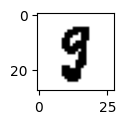

Actual Label: 9, Predicted Label: 4


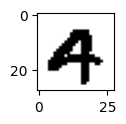

Actual Label: 3, Predicted Label: 5


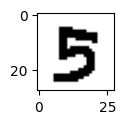

Actual Label: 5, Predicted Label: 8


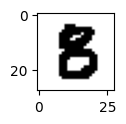

Actual Label: 5, Predicted Label: 6


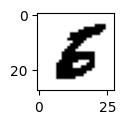

Actual Label: 0, Predicted Label: 2


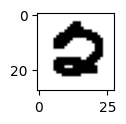

Actual Label: 2, Predicted Label: 7


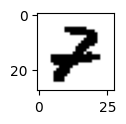

Actual Label: 9, Predicted Label: 7


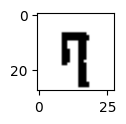

Actual Label: 3, Predicted Label: 5


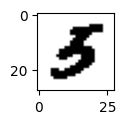

Actual Label: 6, Predicted Label: 5


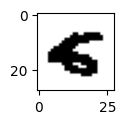

Actual Label: 8, Predicted Label: 4


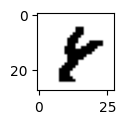

Actual Label: 7, Predicted Label: 2


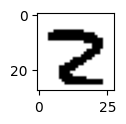

Actual Label: 9, Predicted Label: 4


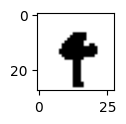

Actual Label: 4, Predicted Label: 9


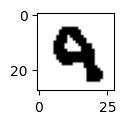

Actual Label: 9, Predicted Label: 7


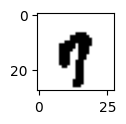

Actual Label: 0, Predicted Label: 2


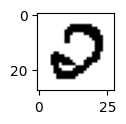

Actual Label: 9, Predicted Label: 8


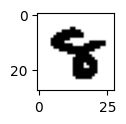

Actual Label: 7, Predicted Label: 3


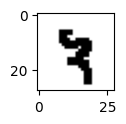

Actual Label: 0, Predicted Label: 7


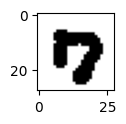

Actual Label: 5, Predicted Label: 6


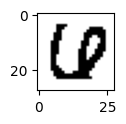

Actual Label: 2, Predicted Label: 9


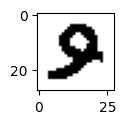

Actual Label: 9, Predicted Label: 4


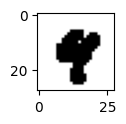

Actual Label: 1, Predicted Label: 6


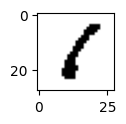

Actual Label: 8, Predicted Label: 2


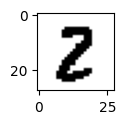

Actual Label: 9, Predicted Label: 4


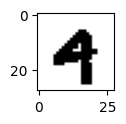

Actual Label: 2, Predicted Label: 1


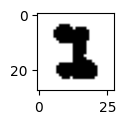

Actual Label: 5, Predicted Label: 0


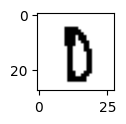

Actual Label: 5, Predicted Label: 2


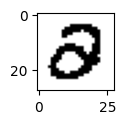

Actual Label: 1, Predicted Label: 9


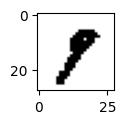

Actual Label: 3, Predicted Label: 5


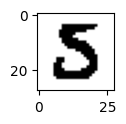

Actual Label: 8, Predicted Label: 5


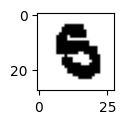

Actual Label: 6, Predicted Label: 1


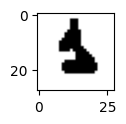

Actual Label: 0, Predicted Label: 8


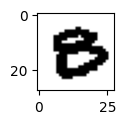

Actual Label: 0, Predicted Label: 9


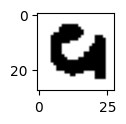

Actual Label: 7, Predicted Label: 2


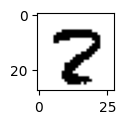

Actual Label: 8, Predicted Label: 3


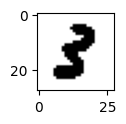

Actual Label: 5, Predicted Label: 3


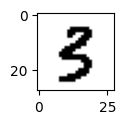

Actual Label: 2, Predicted Label: 7


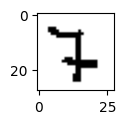

Actual Label: 9, Predicted Label: 5


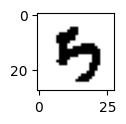

Actual Label: 9, Predicted Label: 4


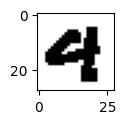

Actual Label: 0, Predicted Label: 9


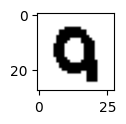

Actual Label: 1, Predicted Label: 9


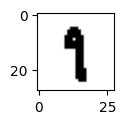

Actual Label: 5, Predicted Label: 8


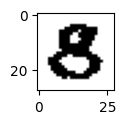

Actual Label: 9, Predicted Label: 4


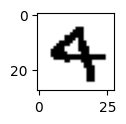

Actual Label: 3, Predicted Label: 8


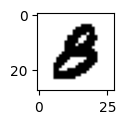

Actual Label: 1, Predicted Label: 9


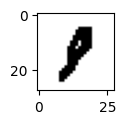

Actual Label: 4, Predicted Label: 6


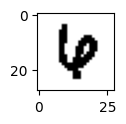

Actual Label: 3, Predicted Label: 8


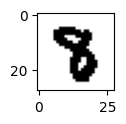

Actual Label: 1, Predicted Label: 2


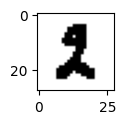

Actual Label: 8, Predicted Label: 1


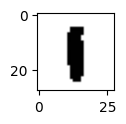

Actual Label: 4, Predicted Label: 2


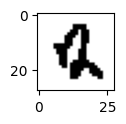

Actual Label: 9, Predicted Label: 4


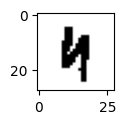

Actual Label: 3, Predicted Label: 5


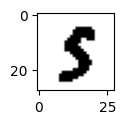

Actual Label: 3, Predicted Label: 5


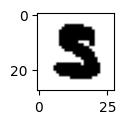

Actual Label: 5, Predicted Label: 3


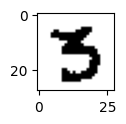

Actual Label: 9, Predicted Label: 7


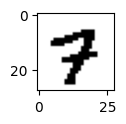

Actual Label: 3, Predicted Label: 5


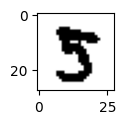

Actual Label: 8, Predicted Label: 5


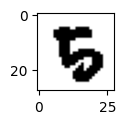

Actual Label: 3, Predicted Label: 5


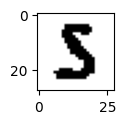

Actual Label: 2, Predicted Label: 3


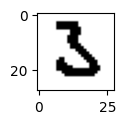

Actual Label: 8, Predicted Label: 5


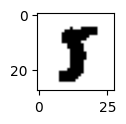

Actual Label: 7, Predicted Label: 5


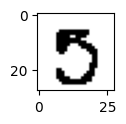

Actual Label: 3, Predicted Label: 5


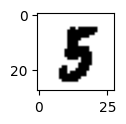

Actual Label: 2, Predicted Label: 8


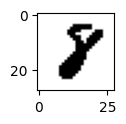

Actual Label: 8, Predicted Label: 7


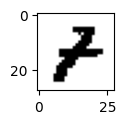

Actual Label: 8, Predicted Label: 2


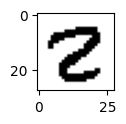

Actual Label: 6, Predicted Label: 0


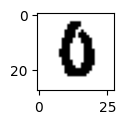

Actual Label: 0, Predicted Label: 9


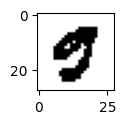

Actual Label: 5, Predicted Label: 8


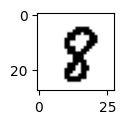

Actual Label: 1, Predicted Label: 6


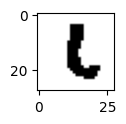

Actual Label: 8, Predicted Label: 5


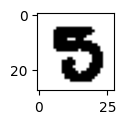

Actual Label: 4, Predicted Label: 7


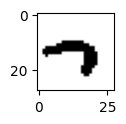

Actual Label: 8, Predicted Label: 0


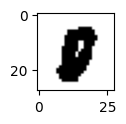

Actual Label: 0, Predicted Label: 6


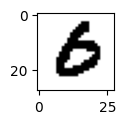

Actual Label: 6, Predicted Label: 3


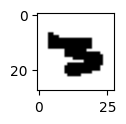

Actual Label: 9, Predicted Label: 4


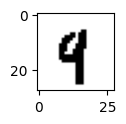

Actual Label: 3, Predicted Label: 2


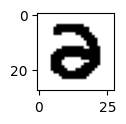

Actual Label: 3, Predicted Label: 5


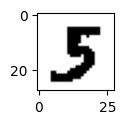

Actual Label: 9, Predicted Label: 4


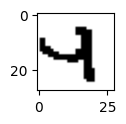

Actual Label: 3, Predicted Label: 5


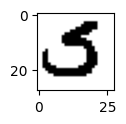

Actual Label: 4, Predicted Label: 9


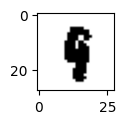

Actual Label: 0, Predicted Label: 8


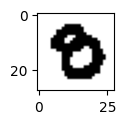

Actual Label: 5, Predicted Label: 3


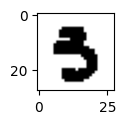

Actual Label: 9, Predicted Label: 4


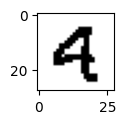

Actual Label: 8, Predicted Label: 3


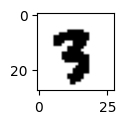

Actual Label: 0, Predicted Label: 5


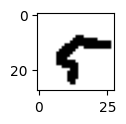

Actual Label: 2, Predicted Label: 3


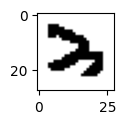

Actual Label: 7, Predicted Label: 3


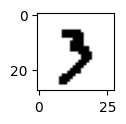

Actual Label: 5, Predicted Label: 3


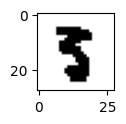

Actual Label: 7, Predicted Label: 5


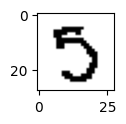

Actual Label: 9, Predicted Label: 8


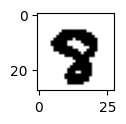

Actual Label: 5, Predicted Label: 6


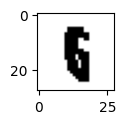

Actual Label: 1, Predicted Label: 9


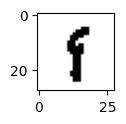

Actual Label: 7, Predicted Label: 9


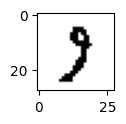

Actual Label: 2, Predicted Label: 1


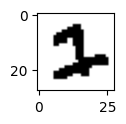

Actual Label: 5, Predicted Label: 3


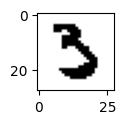

Actual Label: 9, Predicted Label: 5


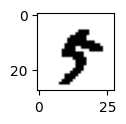

Actual Label: 0, Predicted Label: 6


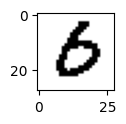

Actual Label: 2, Predicted Label: 1


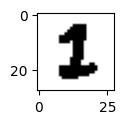

Actual Label: 9, Predicted Label: 4


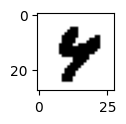

Actual Label: 9, Predicted Label: 7


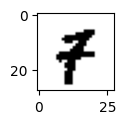

Actual Label: 9, Predicted Label: 5


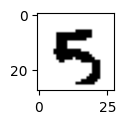

Actual Label: 7, Predicted Label: 5


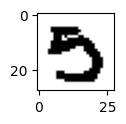

Actual Label: 4, Predicted Label: 9


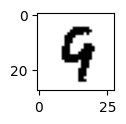

Actual Label: 1, Predicted Label: 3


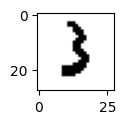

Actual Label: 4, Predicted Label: 7


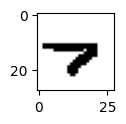

Actual Label: 2, Predicted Label: 3


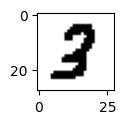

Actual Label: 3, Predicted Label: 8


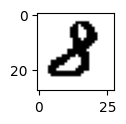

Actual Label: 3, Predicted Label: 9


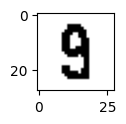

Actual Label: 2, Predicted Label: 6


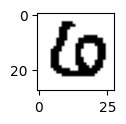

Actual Label: 8, Predicted Label: 2


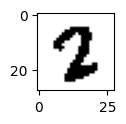

Actual Label: 7, Predicted Label: 8


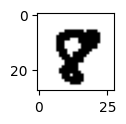

Actual Label: 4, Predicted Label: 7


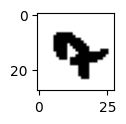

Actual Label: 2, Predicted Label: 7


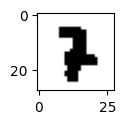

Actual Label: 3, Predicted Label: 2


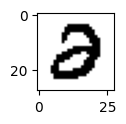

Actual Label: 9, Predicted Label: 7


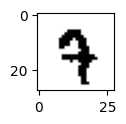

Actual Label: 8, Predicted Label: 3


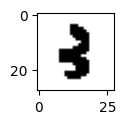

Actual Label: 9, Predicted Label: 4


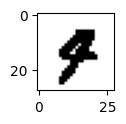

Actual Label: 9, Predicted Label: 4


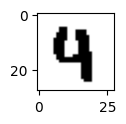

Actual Label: 0, Predicted Label: 6


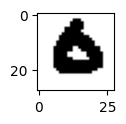

Actual Label: 1, Predicted Label: 2


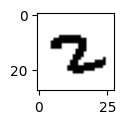

Actual Label: 9, Predicted Label: 4


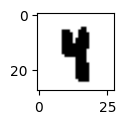

Actual Label: 4, Predicted Label: 5


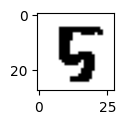

Actual Label: 7, Predicted Label: 3


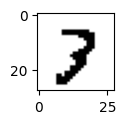

Actual Label: 9, Predicted Label: 4


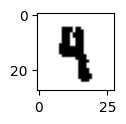

Actual Label: 1, Predicted Label: 9


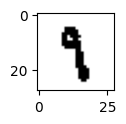

Actual Label: 4, Predicted Label: 6


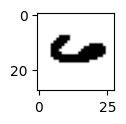

Actual Label: 2, Predicted Label: 3


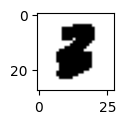

Actual Label: 5, Predicted Label: 6


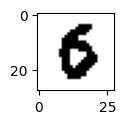

Actual Label: 0, Predicted Label: 5


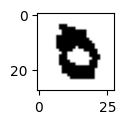

Actual Label: 5, Predicted Label: 8


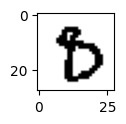

Actual Label: 8, Predicted Label: 5


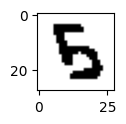

Actual Label: 5, Predicted Label: 8


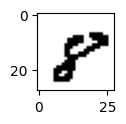

Actual Label: 4, Predicted Label: 7


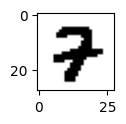

Actual Label: 3, Predicted Label: 9


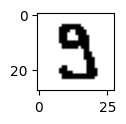

Actual Label: 8, Predicted Label: 1


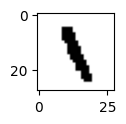

Actual Label: 0, Predicted Label: 7


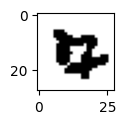

Actual Label: 3, Predicted Label: 8


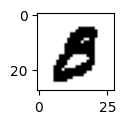

Actual Label: 5, Predicted Label: 8


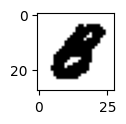

Actual Label: 3, Predicted Label: 9


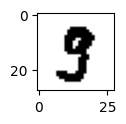

Actual Label: 9, Predicted Label: 4


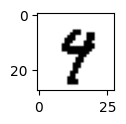

Actual Label: 9, Predicted Label: 4


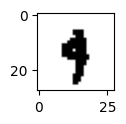

Actual Label: 9, Predicted Label: 7


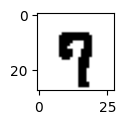

Actual Label: 2, Predicted Label: 7


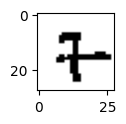

Actual Label: 3, Predicted Label: 8


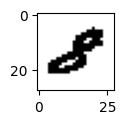

Actual Label: 9, Predicted Label: 4


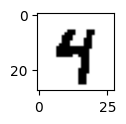

Actual Label: 2, Predicted Label: 7


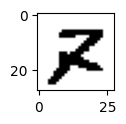

Actual Label: 8, Predicted Label: 5


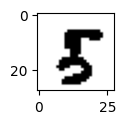

Actual Label: 6, Predicted Label: 4


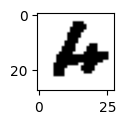

Actual Label: 8, Predicted Label: 2


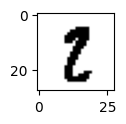

Actual Label: 0, Predicted Label: 6


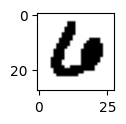

Actual Label: 8, Predicted Label: 5


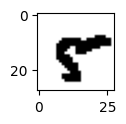

Actual Label: 3, Predicted Label: 7


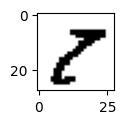

Actual Label: 4, Predicted Label: 2


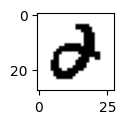

Actual Label: 8, Predicted Label: 2


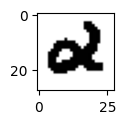

Actual Label: 6, Predicted Label: 0


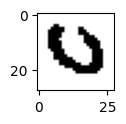

Actual Label: 4, Predicted Label: 9


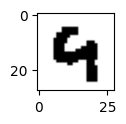

Actual Label: 9, Predicted Label: 7


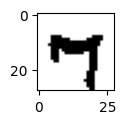

Actual Label: 1, Predicted Label: 7


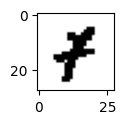

Actual Label: 2, Predicted Label: 6


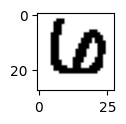

Actual Label: 3, Predicted Label: 7


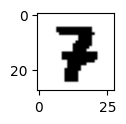

Actual Label: 5, Predicted Label: 6


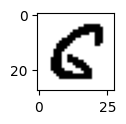

Actual Label: 0, Predicted Label: 5


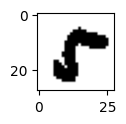

Actual Label: 3, Predicted Label: 2


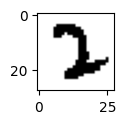

Actual Label: 4, Predicted Label: 9


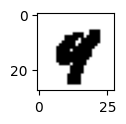

Actual Label: 6, Predicted Label: 5


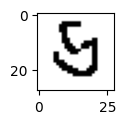

Actual Label: 3, Predicted Label: 5


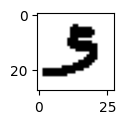

Actual Label: 3, Predicted Label: 1


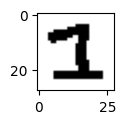

Actual Label: 3, Predicted Label: 9


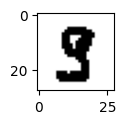

Actual Label: 6, Predicted Label: 4


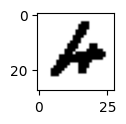

Actual Label: 5, Predicted Label: 3


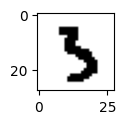

Actual Label: 8, Predicted Label: 2


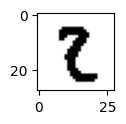

Actual Label: 5, Predicted Label: 8


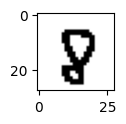

Actual Label: 2, Predicted Label: 3


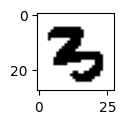

Actual Label: 1, Predicted Label: 7


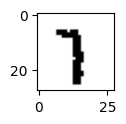

Actual Label: 8, Predicted Label: 9


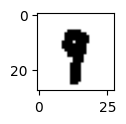

Actual Label: 4, Predicted Label: 9


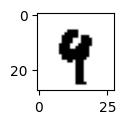

Actual Label: 1, Predicted Label: 2


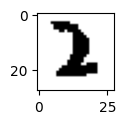

Actual Label: 4, Predicted Label: 9


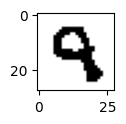

Actual Label: 4, Predicted Label: 7


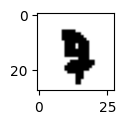

Actual Label: 9, Predicted Label: 4


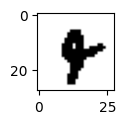

Actual Label: 5, Predicted Label: 3


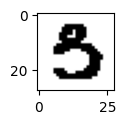

Actual Label: 5, Predicted Label: 6


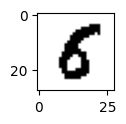

Actual Label: 2, Predicted Label: 0


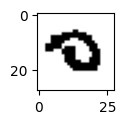

Actual Label: 3, Predicted Label: 5


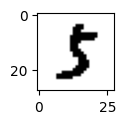

Actual Label: 0, Predicted Label: 8


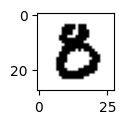

Actual Label: 7, Predicted Label: 9


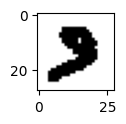

Actual Label: 4, Predicted Label: 9


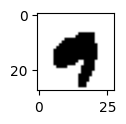

Actual Label: 1, Predicted Label: 5


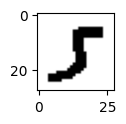

Actual Label: 2, Predicted Label: 8


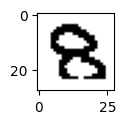

Actual Label: 3, Predicted Label: 8


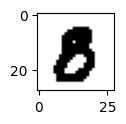

Actual Label: 1, Predicted Label: 5


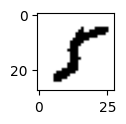

Actual Label: 3, Predicted Label: 8


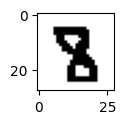

Actual Label: 0, Predicted Label: 9


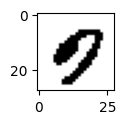

Actual Label: 4, Predicted Label: 2


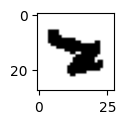

Actual Label: 9, Predicted Label: 7


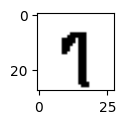

Actual Label: 7, Predicted Label: 1


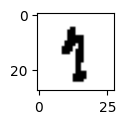

Actual Label: 1, Predicted Label: 2


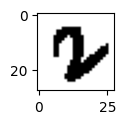

Actual Label: 5, Predicted Label: 6


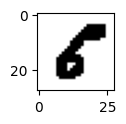

Actual Label: 3, Predicted Label: 1


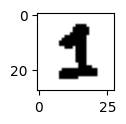

Actual Label: 7, Predicted Label: 9


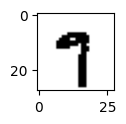

Actual Label: 9, Predicted Label: 7


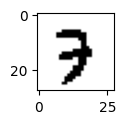

Actual Label: 8, Predicted Label: 2


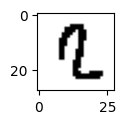

Actual Label: 8, Predicted Label: 4


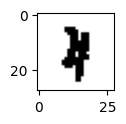

Actual Label: 3, Predicted Label: 5


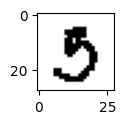

Actual Label: 7, Predicted Label: 2


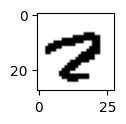

Actual Label: 3, Predicted Label: 7


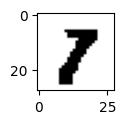

Actual Label: 8, Predicted Label: 5


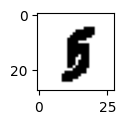

Actual Label: 8, Predicted Label: 5


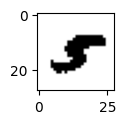

Actual Label: 7, Predicted Label: 3


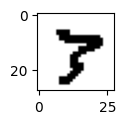

Actual Label: 9, Predicted Label: 4


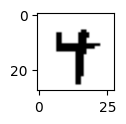

Actual Label: 8, Predicted Label: 5


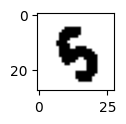

Actual Label: 7, Predicted Label: 3


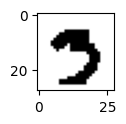

Actual Label: 8, Predicted Label: 5


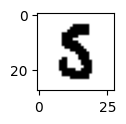

Actual Label: 7, Predicted Label: 9


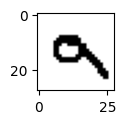

Actual Label: 9, Predicted Label: 5


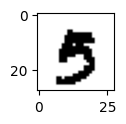

Actual Label: 8, Predicted Label: 5


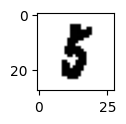

Actual Label: 4, Predicted Label: 9


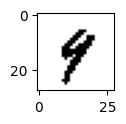

Actual Label: 6, Predicted Label: 5


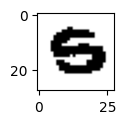

Actual Label: 5, Predicted Label: 8


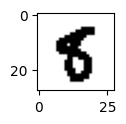

Actual Label: 9, Predicted Label: 7


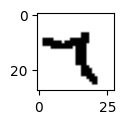

Actual Label: 4, Predicted Label: 9


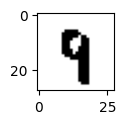

Actual Label: 8, Predicted Label: 2


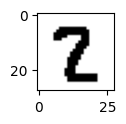

Actual Label: 3, Predicted Label: 7


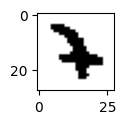

Actual Label: 7, Predicted Label: 3


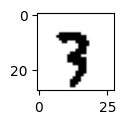

Actual Label: 0, Predicted Label: 6


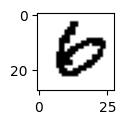

Actual Label: 8, Predicted Label: 2


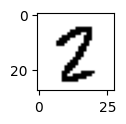

Actual Label: 6, Predicted Label: 0


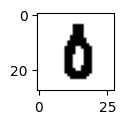

Actual Label: 7, Predicted Label: 8


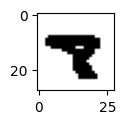

Actual Label: 8, Predicted Label: 7


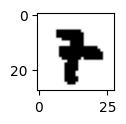

Actual Label: 1, Predicted Label: 9


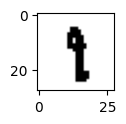

Actual Label: 7, Predicted Label: 2


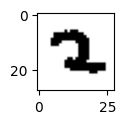

Actual Label: 3, Predicted Label: 8


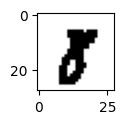

Actual Label: 3, Predicted Label: 7


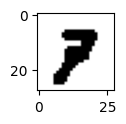

Actual Label: 9, Predicted Label: 4


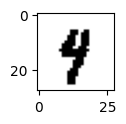

Actual Label: 2, Predicted Label: 6


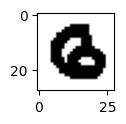

Actual Label: 2, Predicted Label: 4


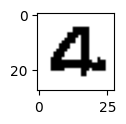

Actual Label: 9, Predicted Label: 7


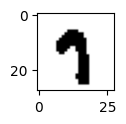

Actual Label: 8, Predicted Label: 5


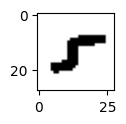

Actual Label: 4, Predicted Label: 8


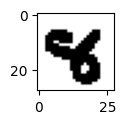

Actual Label: 4, Predicted Label: 2


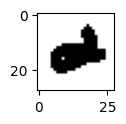

Actual Label: 5, Predicted Label: 3


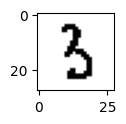

Actual Label: 9, Predicted Label: 8


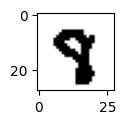

Actual Label: 3, Predicted Label: 8


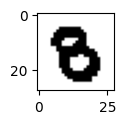

Actual Label: 2, Predicted Label: 7


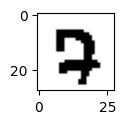

Actual Label: 9, Predicted Label: 4


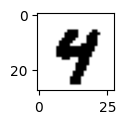

Actual Label: 5, Predicted Label: 6


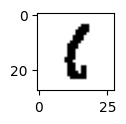

Actual Label: 7, Predicted Label: 8


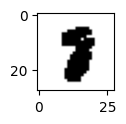

Actual Label: 4, Predicted Label: 9


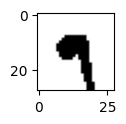

Actual Label: 9, Predicted Label: 3


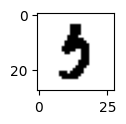

Actual Label: 6, Predicted Label: 4


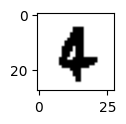

Actual Label: 1, Predicted Label: 9


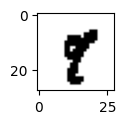

Actual Label: 8, Predicted Label: 3


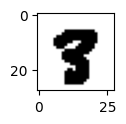

Actual Label: 0, Predicted Label: 8


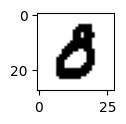

Actual Label: 5, Predicted Label: 3


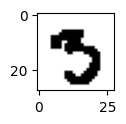

Actual Label: 0, Predicted Label: 6


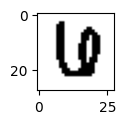

Actual Label: 4, Predicted Label: 9


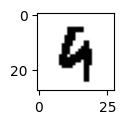

Actual Label: 2, Predicted Label: 7


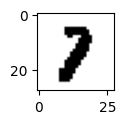

Actual Label: 6, Predicted Label: 8


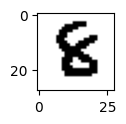

Actual Label: 9, Predicted Label: 4


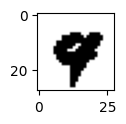

Actual Label: 9, Predicted Label: 8


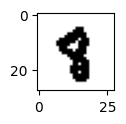

Actual Label: 0, Predicted Label: 9


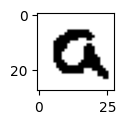

Actual Label: 4, Predicted Label: 2


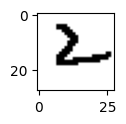

Actual Label: 4, Predicted Label: 8


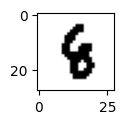

Actual Label: 8, Predicted Label: 0


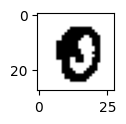

Actual Label: 1, Predicted Label: 7


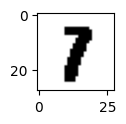

Actual Label: 6, Predicted Label: 8


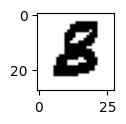

Actual Label: 9, Predicted Label: 4


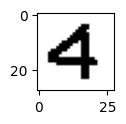

Actual Label: 4, Predicted Label: 9


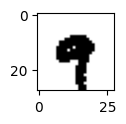

Actual Label: 8, Predicted Label: 5


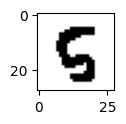

Actual Label: 3, Predicted Label: 2


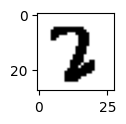

Actual Label: 3, Predicted Label: 2


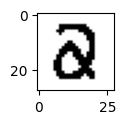

Actual Label: 5, Predicted Label: 6


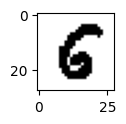

Actual Label: 4, Predicted Label: 8


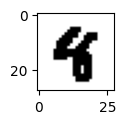

Actual Label: 1, Predicted Label: 7


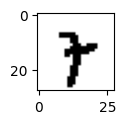

Actual Label: 8, Predicted Label: 3


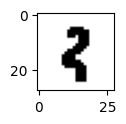

Actual Label: 4, Predicted Label: 9


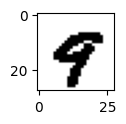

Actual Label: 5, Predicted Label: 3


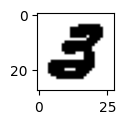

Actual Label: 1, Predicted Label: 8


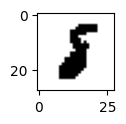

Actual Label: 2, Predicted Label: 3


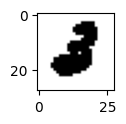

Actual Label: 1, Predicted Label: 4


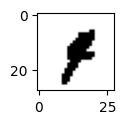

Actual Label: 2, Predicted Label: 3


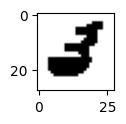

Actual Label: 2, Predicted Label: 3


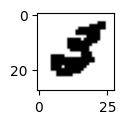

Actual Label: 5, Predicted Label: 3


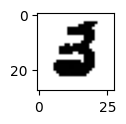

Actual Label: 5, Predicted Label: 0


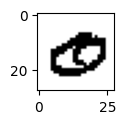

Actual Label: 5, Predicted Label: 8


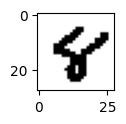

Actual Label: 4, Predicted Label: 8


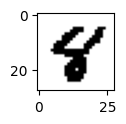

Actual Label: 6, Predicted Label: 8


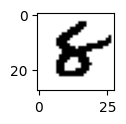

Actual Label: 7, Predicted Label: 9


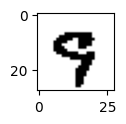

Actual Label: 8, Predicted Label: 2


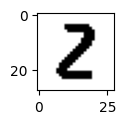

Actual Label: 2, Predicted Label: 7


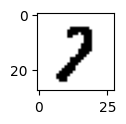

Actual Label: 0, Predicted Label: 8


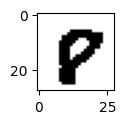

Actual Label: 0, Predicted Label: 8


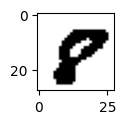

Actual Label: 6, Predicted Label: 1


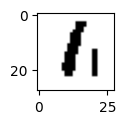

Actual Label: 8, Predicted Label: 1


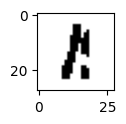

Actual Label: 3, Predicted Label: 8


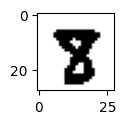

Actual Label: 9, Predicted Label: 7


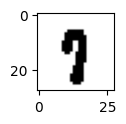

Actual Label: 6, Predicted Label: 8


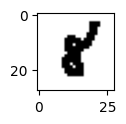

Actual Label: 9, Predicted Label: 4


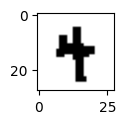

Actual Label: 9, Predicted Label: 7


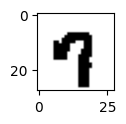

Actual Label: 3, Predicted Label: 2


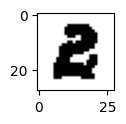

Actual Label: 5, Predicted Label: 1


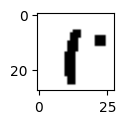

Actual Label: 9, Predicted Label: 7


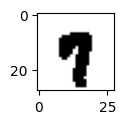

Actual Label: 6, Predicted Label: 4


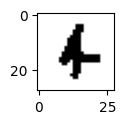

Actual Label: 5, Predicted Label: 8


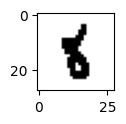

Actual Label: 9, Predicted Label: 7


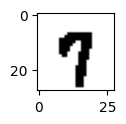

Actual Label: 5, Predicted Label: 0


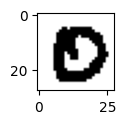

Actual Label: 9, Predicted Label: 7


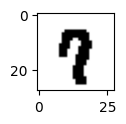

Actual Label: 8, Predicted Label: 2


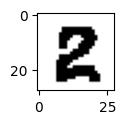

Actual Label: 7, Predicted Label: 3


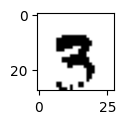

Actual Label: 6, Predicted Label: 5


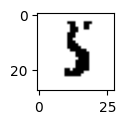

Actual Label: 4, Predicted Label: 6


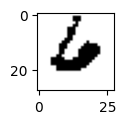

Actual Label: 6, Predicted Label: 8


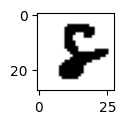

Actual Label: 3, Predicted Label: 5


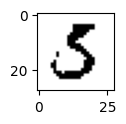

Actual Label: 9, Predicted Label: 7


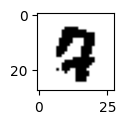

Actual Label: 7, Predicted Label: 4


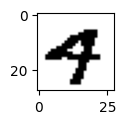

Actual Label: 3, Predicted Label: 5


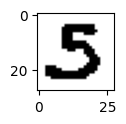

Actual Label: 3, Predicted Label: 5


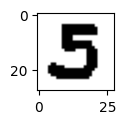

Actual Label: 0, Predicted Label: 7


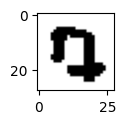

Actual Label: 0, Predicted Label: 4


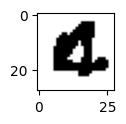

Actual Label: 6, Predicted Label: 5


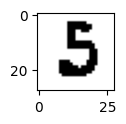

Actual Label: 0, Predicted Label: 3


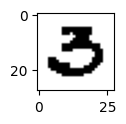

Actual Label: 3, Predicted Label: 5


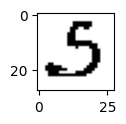

Actual Label: 3, Predicted Label: 5


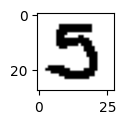

Actual Label: 9, Predicted Label: 4


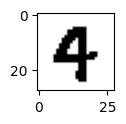

Actual Label: 9, Predicted Label: 4


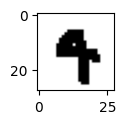

Actual Label: 3, Predicted Label: 5


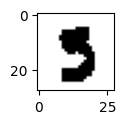

Actual Label: 8, Predicted Label: 3


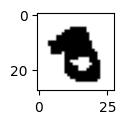

Actual Label: 3, Predicted Label: 5


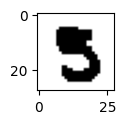

Actual Label: 8, Predicted Label: 3


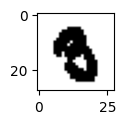

Actual Label: 8, Predicted Label: 5


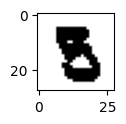

Actual Label: 5, Predicted Label: 3


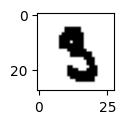

Actual Label: 0, Predicted Label: 2


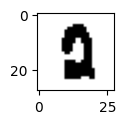

Actual Label: 9, Predicted Label: 4


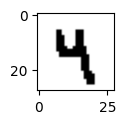

Actual Label: 3, Predicted Label: 5


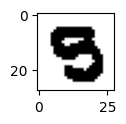

Actual Label: 3, Predicted Label: 5


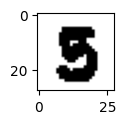

Actual Label: 8, Predicted Label: 3


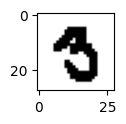

Actual Label: 8, Predicted Label: 3


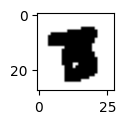

Actual Label: 3, Predicted Label: 9


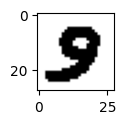

Actual Label: 8, Predicted Label: 9


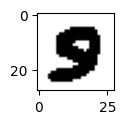

Actual Label: 0, Predicted Label: 9


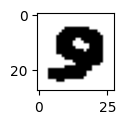

Actual Label: 1, Predicted Label: 2


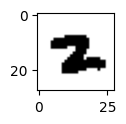

Actual Label: 0, Predicted Label: 9


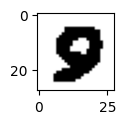

Actual Label: 3, Predicted Label: 9


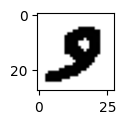

Actual Label: 0, Predicted Label: 9


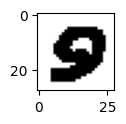

Actual Label: 0, Predicted Label: 9


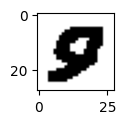

Actual Label: 6, Predicted Label: 5


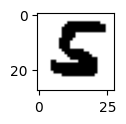

Actual Label: 6, Predicted Label: 8


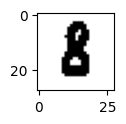

Actual Label: 6, Predicted Label: 2


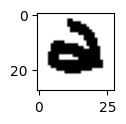

Actual Label: 2, Predicted Label: 6


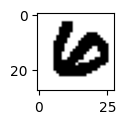

Actual Label: 6, Predicted Label: 0


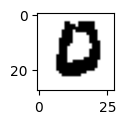

Actual Label: 5, Predicted Label: 3


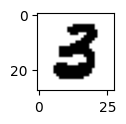

Actual Label: 5, Predicted Label: 3


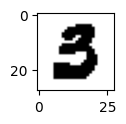

Actual Label: 5, Predicted Label: 3


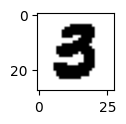

Actual Label: 0, Predicted Label: 9


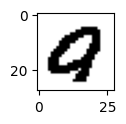

Actual Label: 0, Predicted Label: 3


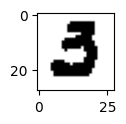

Actual Label: 9, Predicted Label: 8


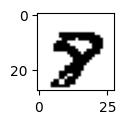

Actual Label: 3, Predicted Label: 9


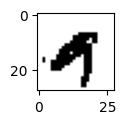

Actual Label: 7, Predicted Label: 3


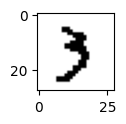

Actual Label: 4, Predicted Label: 9


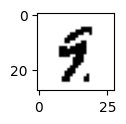

Actual Label: 7, Predicted Label: 9


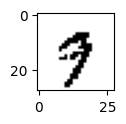

Actual Label: 6, Predicted Label: 2


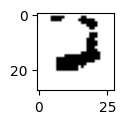

Actual Label: 7, Predicted Label: 0


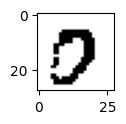

Actual Label: 3, Predicted Label: 5


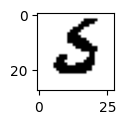

Actual Label: 5, Predicted Label: 8


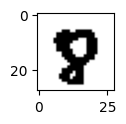

Actual Label: 4, Predicted Label: 6


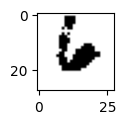

Actual Label: 5, Predicted Label: 3


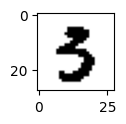

Actual Label: 4, Predicted Label: 8


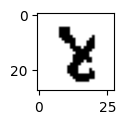

Actual Label: 5, Predicted Label: 9


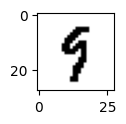

Actual Label: 5, Predicted Label: 8


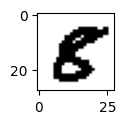

Actual Label: 4, Predicted Label: 9


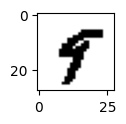

Actual Label: 5, Predicted Label: 0


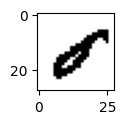

Actual Label: 7, Predicted Label: 5


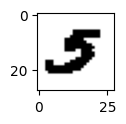

Actual Label: 4, Predicted Label: 2


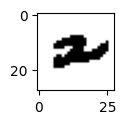

Actual Label: 0, Predicted Label: 9


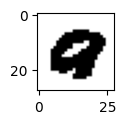

Actual Label: 8, Predicted Label: 2


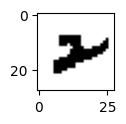

Actual Label: 4, Predicted Label: 5


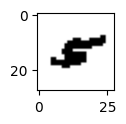

Actual Label: 8, Predicted Label: 5


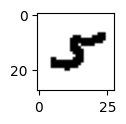

Actual Label: 4, Predicted Label: 2


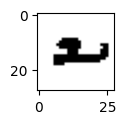

Actual Label: 7, Predicted Label: 2


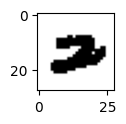

Actual Label: 4, Predicted Label: 6


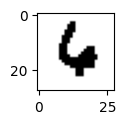

Actual Label: 6, Predicted Label: 2


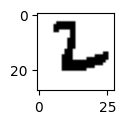

Actual Label: 4, Predicted Label: 6


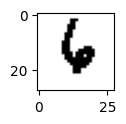

Actual Label: 6, Predicted Label: 5


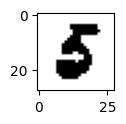

Actual Label: 9, Predicted Label: 8


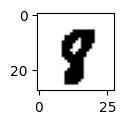

Actual Label: 9, Predicted Label: 3


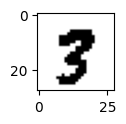

Actual Label: 9, Predicted Label: 8


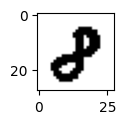

Actual Label: 6, Predicted Label: 0


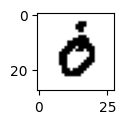

Actual Label: 3, Predicted Label: 8


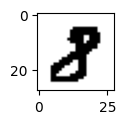

Actual Label: 5, Predicted Label: 3


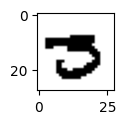

Actual Label: 8, Predicted Label: 5


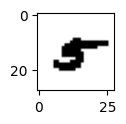

Actual Label: 8, Predicted Label: 4


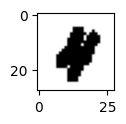

Actual Label: 1, Predicted Label: 7


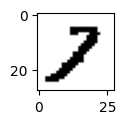

Actual Label: 8, Predicted Label: 4


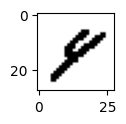

Actual Label: 6, Predicted Label: 5


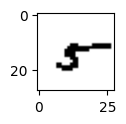

Actual Label: 5, Predicted Label: 9


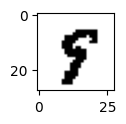

Actual Label: 9, Predicted Label: 2


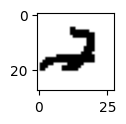

Actual Label: 7, Predicted Label: 2


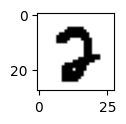

Actual Label: 3, Predicted Label: 5


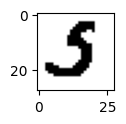

Actual Label: 8, Predicted Label: 2


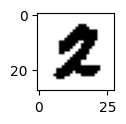

Actual Label: 4, Predicted Label: 5


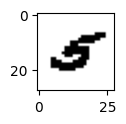

Actual Label: 9, Predicted Label: 8


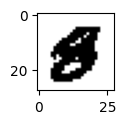

Actual Label: 3, Predicted Label: 2


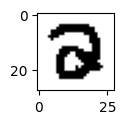

Actual Label: 5, Predicted Label: 3


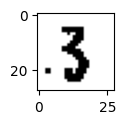

Actual Label: 6, Predicted Label: 5


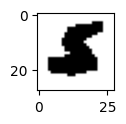

Actual Label: 2, Predicted Label: 3


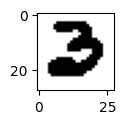

Actual Label: 8, Predicted Label: 1


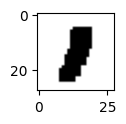

Actual Label: 2, Predicted Label: 3


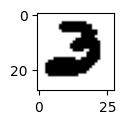

Actual Label: 8, Predicted Label: 5


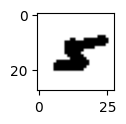

Actual Label: 8, Predicted Label: 1


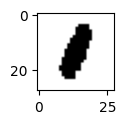

Actual Label: 8, Predicted Label: 5


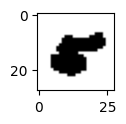

Actual Label: 8, Predicted Label: 1


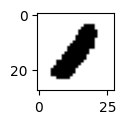

Actual Label: 9, Predicted Label: 3


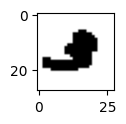

Actual Label: 8, Predicted Label: 5


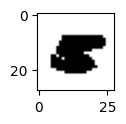

Actual Label: 0, Predicted Label: 6


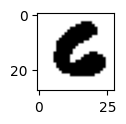

Actual Label: 8, Predicted Label: 1


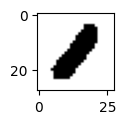

Actual Label: 9, Predicted Label: 2


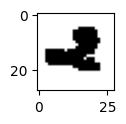

Actual Label: 2, Predicted Label: 3


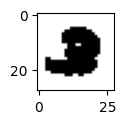

Actual Label: 4, Predicted Label: 5


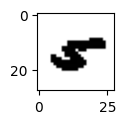

Actual Label: 0, Predicted Label: 6


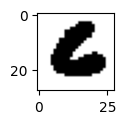

Actual Label: 4, Predicted Label: 5


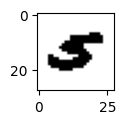

Actual Label: 4, Predicted Label: 2


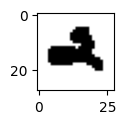

Actual Label: 4, Predicted Label: 5


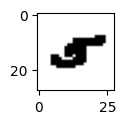

Actual Label: 8, Predicted Label: 1


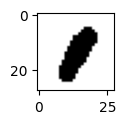

Actual Label: 8, Predicted Label: 1


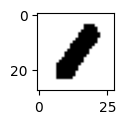

Actual Label: 4, Predicted Label: 2


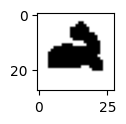

Actual Label: 8, Predicted Label: 5


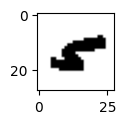

Actual Label: 8, Predicted Label: 1


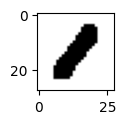

Actual Label: 8, Predicted Label: 1


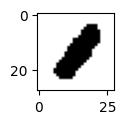

Actual Label: 6, Predicted Label: 2


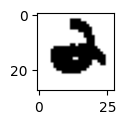

Actual Label: 8, Predicted Label: 1


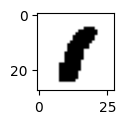

Actual Label: 8, Predicted Label: 1


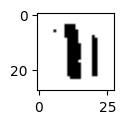

Actual Label: 6, Predicted Label: 2


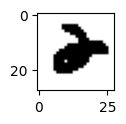

Actual Label: 8, Predicted Label: 5


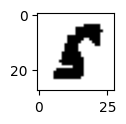

Actual Label: 3, Predicted Label: 5


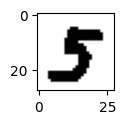

Actual Label: 6, Predicted Label: 4


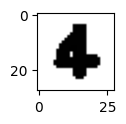

Actual Label: 8, Predicted Label: 2


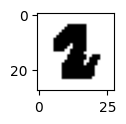

Actual Label: 8, Predicted Label: 2


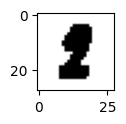

Actual Label: 8, Predicted Label: 4


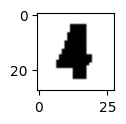

Actual Label: 5, Predicted Label: 8


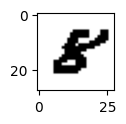

Actual Label: 0, Predicted Label: 6


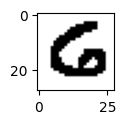

Actual Label: 8, Predicted Label: 3


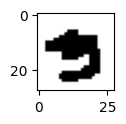

Actual Label: 8, Predicted Label: 3


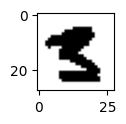

Actual Label: 5, Predicted Label: 3


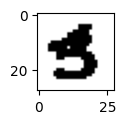

Actual Label: 6, Predicted Label: 8


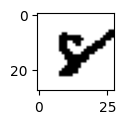

Actual Label: 5, Predicted Label: 8


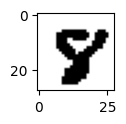

Actual Label: 5, Predicted Label: 3


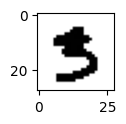

Actual Label: 6, Predicted Label: 8


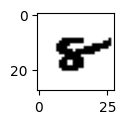

Actual Label: 4, Predicted Label: 2


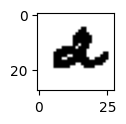

Actual Label: 9, Predicted Label: 4


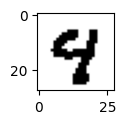

Actual Label: 6, Predicted Label: 8


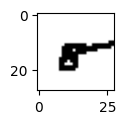

Actual Label: 6, Predicted Label: 8


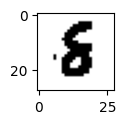

Actual Label: 3, Predicted Label: 5


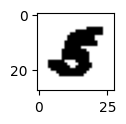

Actual Label: 9, Predicted Label: 4


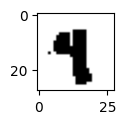

Actual Label: 6, Predicted Label: 8


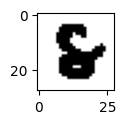

Actual Label: 3, Predicted Label: 2


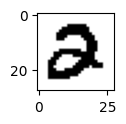

Actual Label: 6, Predicted Label: 5


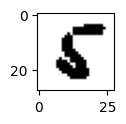

Actual Label: 9, Predicted Label: 3


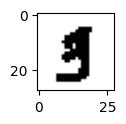

Actual Label: 8, Predicted Label: 3


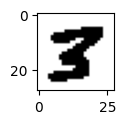

Actual Label: 2, Predicted Label: 7


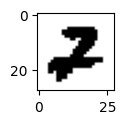

Actual Label: 8, Predicted Label: 2


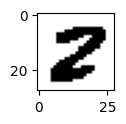

Actual Label: 6, Predicted Label: 5


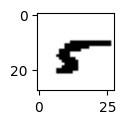

Actual Label: 2, Predicted Label: 7


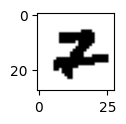

Actual Label: 2, Predicted Label: 7


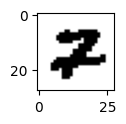

Actual Label: 2, Predicted Label: 7


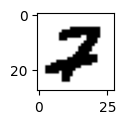

Actual Label: 2, Predicted Label: 7


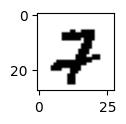

Actual Label: 2, Predicted Label: 7


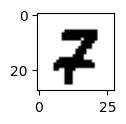

Actual Label: 2, Predicted Label: 7


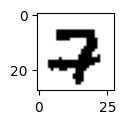

Actual Label: 8, Predicted Label: 1


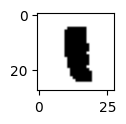

Actual Label: 9, Predicted Label: 3


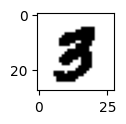

Actual Label: 8, Predicted Label: 2


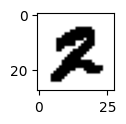

Actual Label: 9, Predicted Label: 4


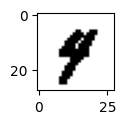

Actual Label: 5, Predicted Label: 8


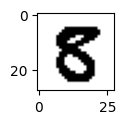

Actual Label: 3, Predicted Label: 8


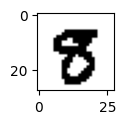

Actual Label: 4, Predicted Label: 6


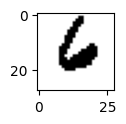

Actual Label: 3, Predicted Label: 5


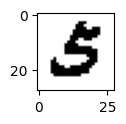

Actual Label: 4, Predicted Label: 8


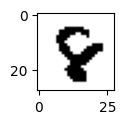

Actual Label: 6, Predicted Label: 2


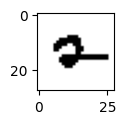

Actual Label: 3, Predicted Label: 5


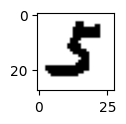

Actual Label: 3, Predicted Label: 5


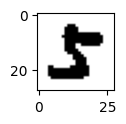

Actual Label: 9, Predicted Label: 7


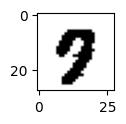

Actual Label: 9, Predicted Label: 4


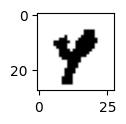

Actual Label: 7, Predicted Label: 9


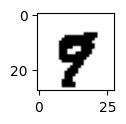

Actual Label: 3, Predicted Label: 7


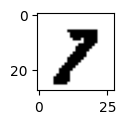

Actual Label: 4, Predicted Label: 9


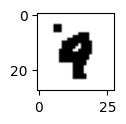

Actual Label: 8, Predicted Label: 2


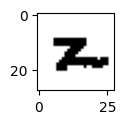

Actual Label: 5, Predicted Label: 3


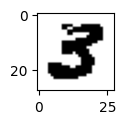

Actual Label: 8, Predicted Label: 3


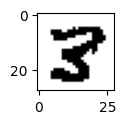

Actual Label: 3, Predicted Label: 0


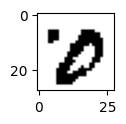

Actual Label: 7, Predicted Label: 9


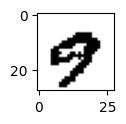

Actual Label: 7, Predicted Label: 1


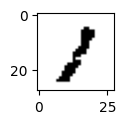

Actual Label: 2, Predicted Label: 3


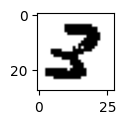

Actual Label: 7, Predicted Label: 2


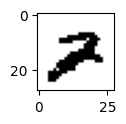

Actual Label: 5, Predicted Label: 6


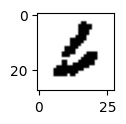

Actual Label: 5, Predicted Label: 6


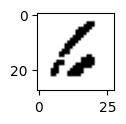

Actual Label: 6, Predicted Label: 2


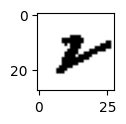

Actual Label: 0, Predicted Label: 2


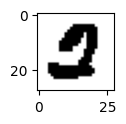

Actual Label: 0, Predicted Label: 5


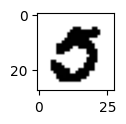

Actual Label: 6, Predicted Label: 5


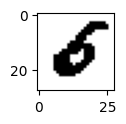

Actual Label: 5, Predicted Label: 8


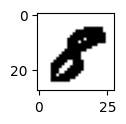

Actual Label: 8, Predicted Label: 9


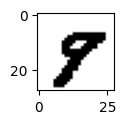

Actual Label: 1, Predicted Label: 8


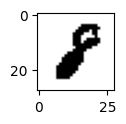

Actual Label: 2, Predicted Label: 4


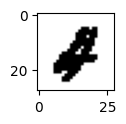

Actual Label: 6, Predicted Label: 5


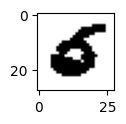

Actual Label: 0, Predicted Label: 2


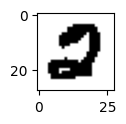

Actual Label: 0, Predicted Label: 2


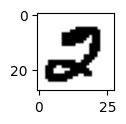

Actual Label: 8, Predicted Label: 4


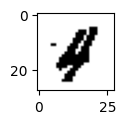

Actual Label: 0, Predicted Label: 2


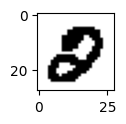

Actual Label: 0, Predicted Label: 5


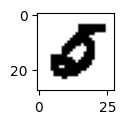

Actual Label: 0, Predicted Label: 5


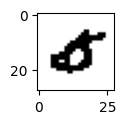

Actual Label: 0, Predicted Label: 2


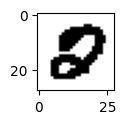

Actual Label: 8, Predicted Label: 4


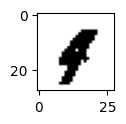

Actual Label: 4, Predicted Label: 9


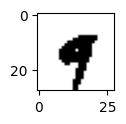

Actual Label: 8, Predicted Label: 2


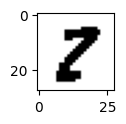

Actual Label: 7, Predicted Label: 2


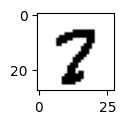

Actual Label: 0, Predicted Label: 3


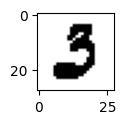

Actual Label: 5, Predicted Label: 9


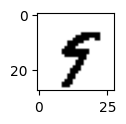

Actual Label: 3, Predicted Label: 6


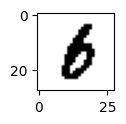

Actual Label: 8, Predicted Label: 2


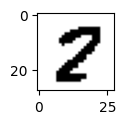

Actual Label: 8, Predicted Label: 2


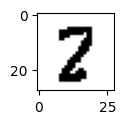

Actual Label: 2, Predicted Label: 0


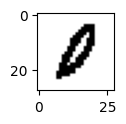

Actual Label: 6, Predicted Label: 5


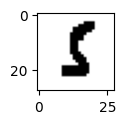

Actual Label: 0, Predicted Label: 6


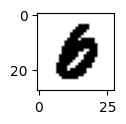

Actual Label: 4, Predicted Label: 9


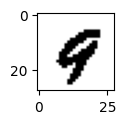

Actual Label: 6, Predicted Label: 8


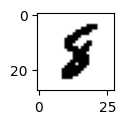

Actual Label: 8, Predicted Label: 2


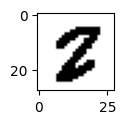

Actual Label: 7, Predicted Label: 3


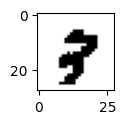

Actual Label: 2, Predicted Label: 3


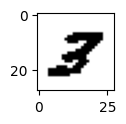

Actual Label: 6, Predicted Label: 5


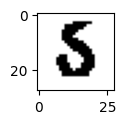

Actual Label: 8, Predicted Label: 3


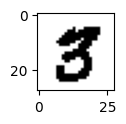

Actual Label: 9, Predicted Label: 3


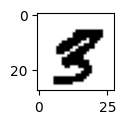

Actual Label: 3, Predicted Label: 5


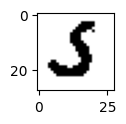

Actual Label: 2, Predicted Label: 3


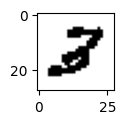

Actual Label: 2, Predicted Label: 5


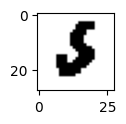

Actual Label: 8, Predicted Label: 3


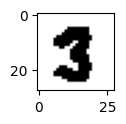

In [29]:
# Put the network in evaluation mode
net.eval()

# Use torch.no_grad() to avoid gradient calculations during inference
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Pass the test images through the neural network
        outputs = net(images)

        # Calculate predictions by selecting the class with the highest probability
        predictions = torch.argmax(outputs, dim=1)

        for i in range(data[0].shape[0]):
            pred = predictions[i].item()
            label = labels[i]

            # Print and visualize misclassified samples
            if label != pred:
                print(f'Actual Label: {pred}, Predicted Label: {label}')
                img = np.reshape(images[i].cpu().numpy(), [28, 28])

                # Display the misclassified image
                imgshow("", np.uint8(img), size=1)

# Explanation:
# - First, we set the neural network ('net') to evaluation mode using 'net.eval()'. This is important for certain layers (e.g., dropout) to work correctly during inference.
# - We use 'torch.no_grad()' to avoid calculating gradients during inference, which is more memory-efficient.
# - In a loop that iterates through the 'testloader', we process one batch of test data at a time.
# - The test images are passed through the neural network to obtain 'outputs', which represent the predicted class scores.
# - We calculate the predicted class by selecting the class with the highest probability using 'torch.argmax'.
# - For each sample in the batch, we compare the actual label ('label') with the predicted label ('pred').
# - If the labels do not match, we print a message indicating the actual and predicted labels.
# - Additionally, we reshape and display the misclassified image using 'imgshow', assuming it is a function for image display.








In [30]:
# Import the necessary library for creating a confusion matrix
from sklearn.metrics import confusion_matrix

# Define the number of classes
nb_classes = 10

# Initialize empty tensors to store predictions and labels
predlist = torch.zeros(0, dtype=torch.long)
lbllist = torch.zeros(0, dtype=torch.long)

# Perform inference without gradient calculations
with torch.no_grad():
    for i, (inputs, classes) in enumerate(testloader):
        # Pass the inputs through the neural network
        outputs = net(inputs)

        # Find the predicted classes by selecting the class with the highest probability
        _, preds = torch.max(outputs, 1)

        # Append batch prediction results to the tensors
        predlist = torch.cat([predlist, preds.view(-1)])
        lbllist = torch.cat([lbllist, classes.view(-1)])

# Calculate the confusion matrix
conf_mat = confusion_matrix(lbllist.numpy(), predlist.numpy())

# Print the confusion matrix
print(conf_mat)

# Calculate and print per-class accuracy
class_accuracy = 100 * conf_mat.diagonal() / conf_mat.sum(1)
print(class_accuracy)

# Explanation:
# - We begin by importing the 'confusion_matrix' function from the 'sklearn.metrics' library, which is used to create a confusion matrix.
# - 'nb_classes' is defined as the number of classes in the classification problem (e.g., 10 for digit classification).
# - Empty tensors 'predlist' and 'lbllist' are initialized to store predicted and true labels, respectively.
# - In the following code block, we perform inference without calculating gradients using 'with torch.no_grad()'.
# - A loop iterates through the 'testloader', processing one batch of test data at a time.
# - The inputs are passed through the neural network to obtain predictions, and the predicted classes are found using 'torch.max'.
# - The predicted classes and true labels for the batch are appended to the 'predlist' and 'lbllist' tensors.
# - We then calculate the confusion matrix using 'confusion_matrix' and print it to evaluate model performance.
# - Finally, we calculate and print the per-class accuracy by dividing the diagonal elements of the confusion matrix by the sum of each row.


[[ 962    0    2    1    0    4    8    1    2    0]
 [   0 1106    3    2    1    2    4    2   15    0]
 [   9    6  937    9   12    2   14   12   26    5]
 [   3    1   15  920    0   32    2   12   18    7]
 [   2    1    7    0  910    1    8    2    8   43]
 [   9    2    1   36    6  783   17    5   26    7]
 [  14    3    5    1   10   14  907    2    2    0]
 [   4    8   24    7    6    0    0  946    2   31]
 [   7    3    6   17   10   25   14    7  875   10]
 [  12    8    1   10   22    5    0    9    6  936]]
[98.16326531 97.44493392 90.79457364 91.08910891 92.66802444 87.78026906
 94.67640919 92.0233463  89.83572895 92.76511397]
